# Define Data (Set 1 and Set 2)

--- All Data ---

In [ ]:
# read csv

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Assigment/My Code/1729768984422O-dr2.csv')
read = df.copy()

summary_read = pd.DataFrame({
    'Data': read.count(),
    'NaN': read.isna().sum()})
summary_read.reset_index(inplace=True)
summary_read.columns = ['Parameter', 'Data', 'NaN']
print(summary_read)

                Parameter     Data      NaN
0                      ra  2338397        0
1                ra_error  2338397        0
2                     dec  2338397        0
3               dec_error  2338397        0
4                parallax  2338397        0
5          parallax_error  2338397        0
6                    pmra  2338397        0
7              pmra_error  2338397        0
8                   pmdec  2338397        0
9             pmdec_error  2338397        0
10        phot_g_mean_mag  2338397        0
11                  bp_rp  2160721   177676
12        radial_velocity   298677  2039720
13  radial_velocity_error   298677  2039720
14                      b  2338397        0
15               teff_val  1056225  1282172


In [ ]:
# Calculate the total proper motion
read['total_pm'] = np.sqrt(read['pmra']**2 + read['pmdec']**2)

# Filter data based on more specific conditions (include parallax condition)
dr2 = read[
    (read['total_pm'] >= 10/3) &
    (np.sqrt(read['pmra_error']**2 + read['pmdec_error']**2) / read['parallax'] <= 0.15) &
    (read['parallax'] >= 1)  # ensuring a minimum parallax value to avoid large errors in distance
].copy()

# Calculate distance in parsecs
dr2['distance_pc'] = 1000 / dr2['parallax']

# Calculate the vertical distance of tracers
dr2['z'] = dr2['distance_pc'] * np.sin(np.radians(dr2['b'])) + 17

In [ ]:
# Add V magnitude calculation from G, BP, and RP bands
f0, f1, f2 = -0.01760, -0.00696, -0.17320
dr2['phot_v_mean_mag'] = dr2['phot_g_mean_mag'] - (f0 + f1 * dr2['bp_rp'] + f2 * (dr2['bp_rp'] ** 2))

# Calculate Absolute Magnitude Mv for HR diagram
dr2['M_V'] = dr2['phot_v_mean_mag'] - 5 * (np.log10(dr2['distance_pc']) - 1)

In [ ]:
# check Teff, G, GBP-GRP, Mv

min0g = dr2['phot_g_mean_mag'].min()
max0g = dr2['phot_g_mean_mag'].max()
print(f"g min all data: {min0g}")
print(f"g max all data: {max0g}")

min0gbp = dr2['bp_rp'].min()
max0gbp = dr2['bp_rp'].max()
print(f"bp rp min all data: {min0gbp}")
print(f"bp rp max all data: {max0gbp}")

min0t = dr2['teff_val'].min()
max0t = dr2['teff_val'].max()
print(f"teff min all data: {min0t}")
print(f"teff max all data: {max0t}")

min0v = dr2['M_V'].min()
max0v = dr2['M_V'].max()
print(f"v min all data: {min0v}")
print(f"v max all data: {max0v}")

g min all data: 1.9249064
g max all data: 20.998068
bp rp min all data: -3.2212734
bp rp max all data: 7.128249
teff min all data: 3229.0
teff max all data: 9803.0
v min all data: -2.484158251557626
v max all data: 26.36365998528988


In [ ]:
# count classify stars

def classify_star(teff):
    if 31900 <= teff <= 44900:
        return 'Class O'
    elif 10400 <= teff < 31900:
        return 'Class B'
    elif 7400 <= teff < 10400:
        return 'Class A'
    elif 5930 <= teff < 7400:
        return 'Class F'
    elif 5380 <= teff < 5930:
        return 'Class G'
    elif 3930 <= teff < 5380:
        return 'Class K'
    elif 2350 <= teff < 3930:
        return 'Class M'
    elif 1370 <= teff < 2350:
        return 'Class L'
    elif 510 <= teff < 1370:
        return 'Class T'
    elif 250 <= teff < 510:
        return 'Class Y'
    else:
        return 'Unknown'

dr2['category'] = dr2['teff_val'].apply(classify_star)
starcounts_all = dr2['category'].value_counts()
print(starcounts_all)

category
Unknown    550476
Class M    449900
Class K    440350
Class G     71723
Class F     47557
Class A     10552
Name: count, dtype: int64


--- Remove NaN of Teff ---

In [ ]:
# check class of all stars

dr2_teff = dr2[dr2['teff_val'].notna()]

summary_teff = pd.DataFrame({
    'Data': dr2_teff.count(),
    'NaN': dr2_teff.isna().sum()})
summary_teff.reset_index(inplace=True)
summary_teff.columns = ['Parameter', 'Data', 'NaN']
print(summary_teff)

                Parameter     Data     NaN
0                      ra  1020082       0
1                ra_error  1020082       0
2                     dec  1020082       0
3               dec_error  1020082       0
4                parallax  1020082       0
5          parallax_error  1020082       0
6                    pmra  1020082       0
7              pmra_error  1020082       0
8                   pmdec  1020082       0
9             pmdec_error  1020082       0
10        phot_g_mean_mag  1020082       0
11                  bp_rp  1020082       0
12        radial_velocity   290381  729701
13  radial_velocity_error   290381  729701
14                      b  1020082       0
15               teff_val  1020082       0
16               total_pm  1020082       0
17            distance_pc  1020082       0
18                      z  1020082       0
19        phot_v_mean_mag  1020082       0
20                    M_V  1020082       0
21               category  1020082       0


In [ ]:
# data set 0 details

ra0 = dr2_teff['ra']
ra_error0 = dr2_teff['ra_error']
dec0 = dr2_teff['dec']
dec_error0 = dr2_teff['dec_error']
parallax0 = dr2_teff['parallax']
parallax_error0 = dr2_teff['parallax_error']
pmra0 = dr2_teff['pmra']
pmra_error0 = dr2_teff['pmra_error']
pmdec0 = dr2_teff['pmdec']
pmdec_error0 = dr2_teff['pmdec_error']
phot_g_mean_mag0 = dr2_teff['phot_g_mean_mag']
bp_rp0 = dr2_teff['bp_rp']
radial_velocity0 = dr2_teff['radial_velocity']
radial_velocity_error0 = dr2_teff['radial_velocity_error']
b0 = dr2_teff['b']
teff_val0 = dr2_teff['teff_val']
phot_v_mean_mag0 = dr2_teff['phot_v_mean_mag']

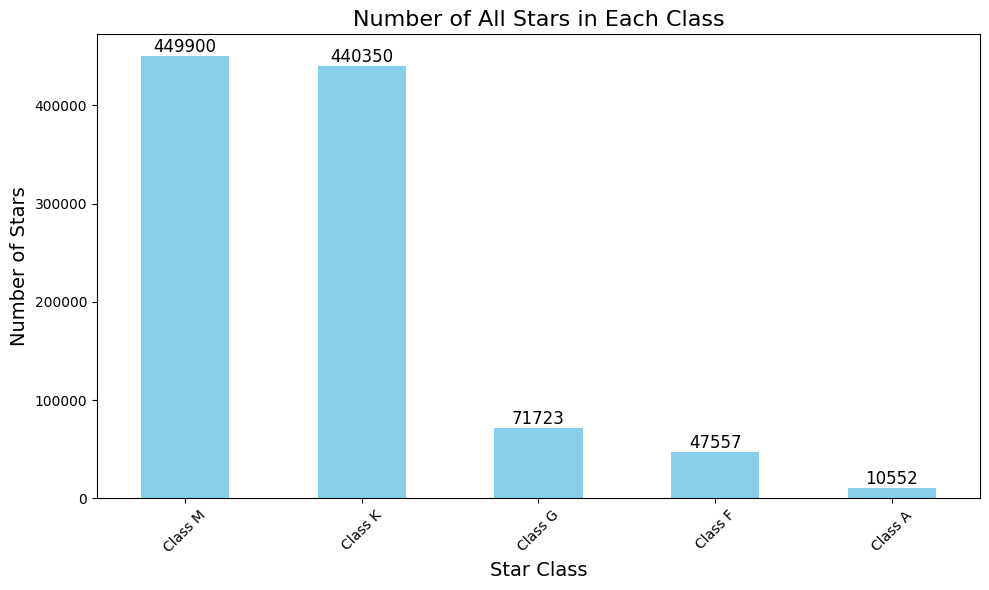

In [ ]:
# bar plot for classify all stars

starcounts_teff = dr2_teff['category'].value_counts()
plt.figure(figsize=(10, 6))
starcounts_teff.plot(kind='bar', color='skyblue')
plt.title('Number of All Stars in Each Class', fontsize=16)
plt.xlabel('Star Class', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
for index, value in enumerate(starcounts_teff):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- SET 1 with Teff ---

In [ ]:
# define set 1

set1 = dr2_teff[dr2_teff['category'] == 'Class K']

summary_set1 = pd.DataFrame({
    'Data': set1.count(),
    'NaN': set1.isna().sum()})
summary_set1.reset_index(inplace=True)
summary_set1.columns = ['Parameter', 'Data', 'NaN']
print(summary_set1)

                Parameter    Data     NaN
0                      ra  440350       0
1                ra_error  440350       0
2                     dec  440350       0
3               dec_error  440350       0
4                parallax  440350       0
5          parallax_error  440350       0
6                    pmra  440350       0
7              pmra_error  440350       0
8                   pmdec  440350       0
9             pmdec_error  440350       0
10        phot_g_mean_mag  440350       0
11                  bp_rp  440350       0
12        radial_velocity  178258  262092
13  radial_velocity_error  178258  262092
14                      b  440350       0
15               teff_val  440350       0
16               total_pm  440350       0
17            distance_pc  440350       0
18                      z  440350       0
19        phot_v_mean_mag  440350       0
20                    M_V  440350       0
21               category  440350       0


In [ ]:
# check Teff, G, GBP-GRP, Mv

min1g = set1['phot_g_mean_mag'].min()
max1g = set1['phot_g_mean_mag'].max()
print(f"g min set 1: {min1g}")
print(f"g max set 1: {max1g}")

min1gbp = set1['bp_rp'].min()
max1gbp = set1['bp_rp'].max()
print(f"bp rp min set 1: {min1gbp}")
print(f"bp rp max set 1: {max1gbp}")

min1t = set1['teff_val'].min()
max1t = set1['teff_val'].max()
print(f"teff min set 1: {min1t}")
print(f"teff max set 1: {max1t}")

min1v = set1['M_V'].min()
max1v = set1['M_V'].max()
print(f"v min set 1: {min1v}")
print(f"v max set 1: {max1v}")

g min set 1: 1.9249064
g max set 1: 17.068748
bp rp min set 1: -0.76004505
bp rp max set 1: 5.0894012
teff min set 1: 3930.0
teff max set 1: 5379.975
v min set 1: -2.484158251557626
v max set 1: 19.61712590171651


--- Remove NaN of Vr ---

In [ ]:
# check class of clean stars

dr2_clean = dr2_teff[dr2_teff['radial_velocity'].notna()]

summary_clean = pd.DataFrame({
    'Data': dr2_clean.count(),
    'NaN': dr2_clean.isna().sum()})
summary_clean.reset_index(inplace=True)
summary_clean.columns = ['Parameter', 'Data', 'NaN']
print(summary_clean)

                Parameter    Data  NaN
0                      ra  290381    0
1                ra_error  290381    0
2                     dec  290381    0
3               dec_error  290381    0
4                parallax  290381    0
5          parallax_error  290381    0
6                    pmra  290381    0
7              pmra_error  290381    0
8                   pmdec  290381    0
9             pmdec_error  290381    0
10        phot_g_mean_mag  290381    0
11                  bp_rp  290381    0
12        radial_velocity  290381    0
13  radial_velocity_error  290381    0
14                      b  290381    0
15               teff_val  290381    0
16               total_pm  290381    0
17            distance_pc  290381    0
18                      z  290381    0
19        phot_v_mean_mag  290381    0
20                    M_V  290381    0
21               category  290381    0


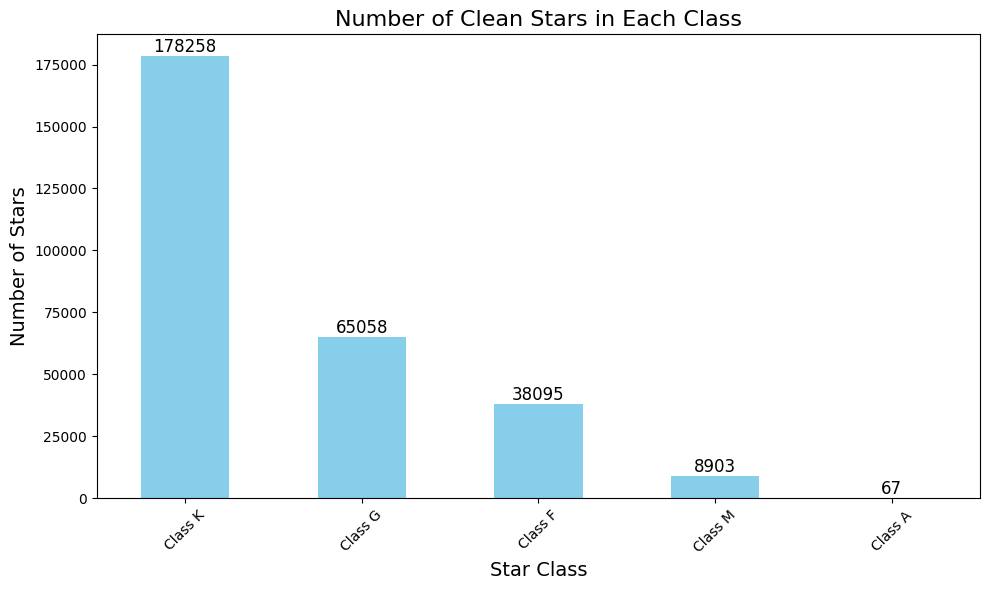

In [ ]:
# bar plot for classify clean stars

starcounts_clean = dr2_clean['category'].value_counts()
plt.figure(figsize=(10, 6))
starcounts_clean.plot(kind='bar', color='skyblue')
plt.title('Number of Clean Stars in Each Class', fontsize=16)
plt.xlabel('Star Class', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
for index, value in enumerate(starcounts_clean):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- SET 2 with Vr ---

In [ ]:
# define set 2

set2 = dr2_clean[dr2_clean['category'] == 'Class K']

summary_set2 = pd.DataFrame({
    'Data': set2.count(),
    'NaN': set2.isna().sum()})
summary_set2.reset_index(inplace=True)
summary_set2.columns = ['Parameter', 'Data', 'NaN']
print(summary_set2)

                Parameter    Data  NaN
0                      ra  178258    0
1                ra_error  178258    0
2                     dec  178258    0
3               dec_error  178258    0
4                parallax  178258    0
5          parallax_error  178258    0
6                    pmra  178258    0
7              pmra_error  178258    0
8                   pmdec  178258    0
9             pmdec_error  178258    0
10        phot_g_mean_mag  178258    0
11                  bp_rp  178258    0
12        radial_velocity  178258    0
13  radial_velocity_error  178258    0
14                      b  178258    0
15               teff_val  178258    0
16               total_pm  178258    0
17            distance_pc  178258    0
18                      z  178258    0
19        phot_v_mean_mag  178258    0
20                    M_V  178258    0
21               category  178258    0


In [ ]:
# check Teff, G, GBP-GRP, Mv

min2g = set2['phot_g_mean_mag'].min()
max2g = set2['phot_g_mean_mag'].max()
print(f"g min set 2: {min2g}")
print(f"g max set 2: {max2g}")

min2gbp = set2['bp_rp'].min()
max2gbp = set2['bp_rp'].max()
print(f"bp rp min set 2: {min2gbp}")
print(f"bp rp max set 2: {max2gbp}")

min2t = set2['teff_val'].min()
max2t = set2['teff_val'].max()
print(f"teff min set 2: {min2t}")
print(f"teff max set 2: {max2t}")

min2v = set2['M_V'].min()
max2v = set2['M_V'].max()
print(f"v min set 2: {min2v}")
print(f"v max set 2: {max2v}")

g min set 2: 2.1506112
g max set 2: 16.692577
bp rp min set 2: 0.04663372
bp rp max set 2: 3.811433
teff min set 2: 3930.0
teff max set 2: 5379.975
v min set 2: -2.006897750432234
v max set 2: 12.914006238930305


--- All Data vs Tracer ---

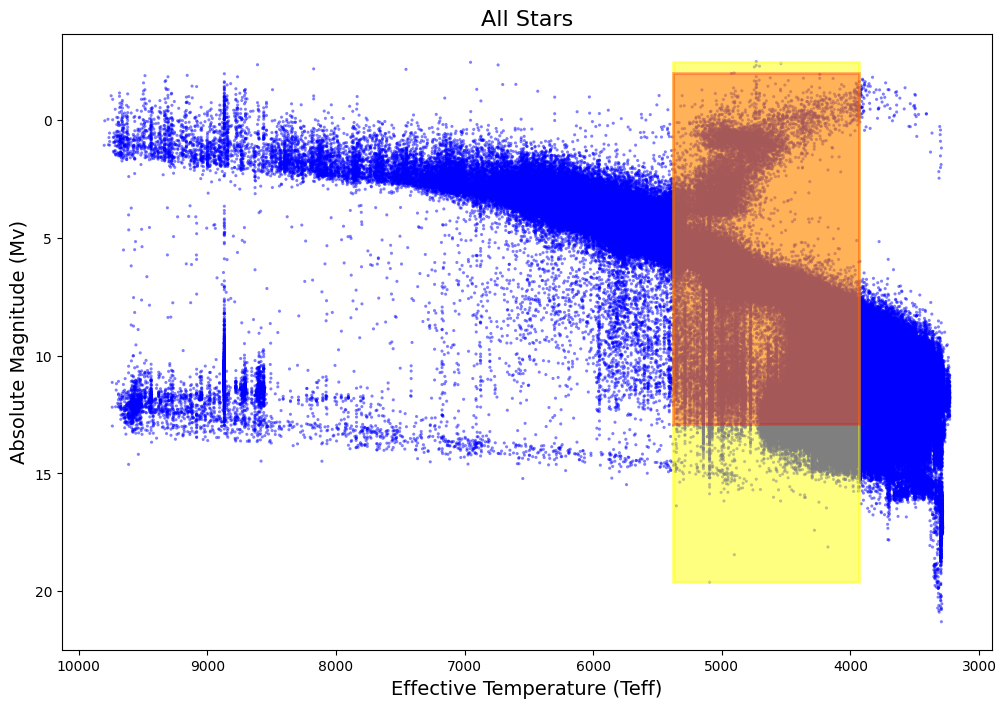

In [ ]:
# plot scatter all data and tracer

plt.figure(figsize=(12, 8))
plt.scatter(dr2_teff['teff_val'], dr2_teff['M_V'], c='blue', alpha=0.5, s=5, edgecolor='none')
teff_min1, teff_max1 = min1t, max1t
mv_min1, mv_max1 = min1v, max1v
teff_min2, teff_max2 = min2t, max2t
mv_min2, mv_max2 = min2v, max2v

rectangle1 = patches.Rectangle((teff_min1, mv_min1),
                               teff_max1 - teff_min1,
                               mv_max1 - mv_min1,
                               linewidth=2,
                               edgecolor='yellow',
                               facecolor='yellow',
                               alpha=0.5)

rectangle2 = patches.Rectangle((teff_min2, mv_min2),
                               teff_max2 - teff_min2,
                               mv_max2 - mv_min2,
                               linewidth=2,
                               edgecolor='red',
                               facecolor='red',
                               alpha=0.3)

plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.xlabel('Effective Temperature (Teff)', fontsize=14)
plt.ylabel('Absolute Magnitude (Mv)', fontsize=14)
plt.title('All Stars', fontsize=16)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()



# ---

---





# TESTTTTTTT for define data (prefer use this code for define data)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

/Users/izza/Documents/joki/tugas astronomi/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


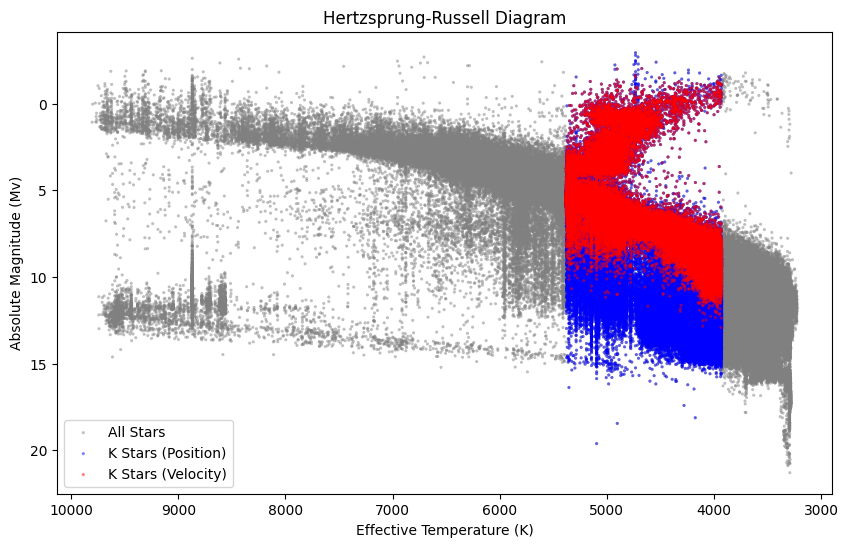

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

df = pd.read_csv('1729768984422O-dr2.csv')
read = df.copy()

# Assuming 'read' is your DataFrame loaded with Gaia data
# Calculate the total proper motion
# read['total_pm'] = np.sqrt(read['pmra']**2 + read['pmdec']**2)

# Calculate distance in parsecs
read['distance_pc'] = 1000 / read['parallax']

# Calculate the vertical distance of tracers
read['z'] = read['distance_pc'] * np.sin(np.radians(read['b'])) + 17

# Calculate cylindrical radius (r = d * cos(b))
read['r_cyl'] = read['distance_pc'] * np.cos(np.radians(read['b']))

# Filter data based on more specific conditions (include parallax condition)
filtered_data = read[
    (read['parallax'] >= (10/3)*u.mas) &  # parallax ≥ 10/3 mas
    (read['parallax_error']/read['parallax'] <= 0.15) &
    # (read['bp_rp'] >= -0.5) & (read['bp_rp'] <= 2.75) &# relative parallax error ≤ 0.15
    (read['r_cyl'] <= 150) &  # cylinder radius ≤ 150 pc
    (abs(read['z']) <= 200)  # cylinder height ≤ 200 pc
].copy()

# Add V magnitude calculation from G, BP, and RP bands
f0, f1, f2 = -0.01760, -0.00696, -0.17320
filtered_data['phot_v_mean_mag'] = filtered_data['phot_g_mean_mag'] - (f0 + f1 * filtered_data['bp_rp'] + f2 * (filtered_data['bp_rp'] ** 2))

# Calculate Absolute Magnitude Mv for HR diagram
filtered_data['M_V'] = filtered_data['phot_v_mean_mag'] - 5 * (np.log10(filtered_data['distance_pc']) - 1)

# Classify stars based on their effective temperature
def classify_star(teff):
    if 31900 <= teff <= 44900:
        return 'Class O'
    elif 10400 <= teff < 31900:
        return 'Class B'
    elif 7400 <= teff < 10400:
        return 'Class A'
    elif 5930 <= teff < 7400:
        return 'Class F'
    elif 5380 <= teff < 5930:
        return 'Class G'
    elif 3930 <= teff < 5380:
        return 'Class K'
    elif 2350 <= teff < 3930:
        return 'Class M'

filtered_data['class'] = filtered_data['teff_val'].apply(classify_star)

# Select data for K class stars based on position (right ascension and declination)
set1 = filtered_data[(filtered_data['class'] == 'Class K')]

# Select data for K class stars based on radial velocity
set2 = set1[set1['radial_velocity'].notna()]

# Plot the HR diagram
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['teff_val'], filtered_data['M_V'], c='gray', alpha=0.5, label='All Stars', s=5, edgecolor='none')
plt.scatter(set1['teff_val'], set1['M_V'], c='blue', alpha=0.5, label='K Stars (Position)', s=5, edgecolor='none')
plt.scatter(set2['teff_val'], set2['M_V'], c='red', alpha=0.5, label='K Stars (Velocity)', s=5, edgecolor='none')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Absolute Magnitude (Mv)')
plt.title('Hertzsprung-Russell Diagram')
plt.legend()
plt.show()

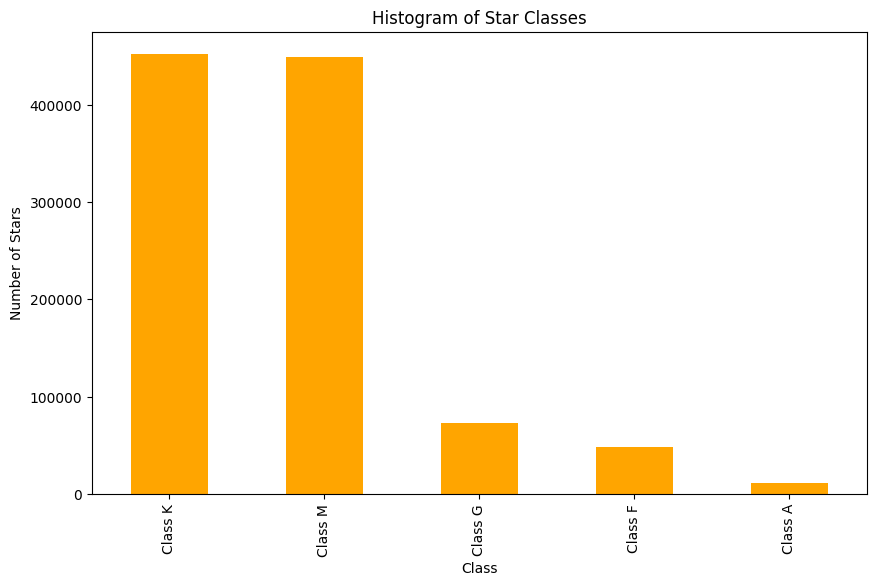

In [3]:
# Plot the histogram of star classes
plt.figure(figsize=(10, 6))
filtered_data['class'].value_counts().plot(kind='bar', color='orange')
plt.title('Histogram of Star Classes')
plt.xlabel('Class')
plt.ylabel('Number of Stars')
plt.show()

# Fitting Tracer Number Density (ν)

--- Vertical Distance of Tracers (z) ---

In [4]:
# create called variable all data

import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

ra0 = filtered_data['ra']
ra_error0 = filtered_data['ra_error']
dec0 = filtered_data['dec']
dec_error0 = filtered_data['dec_error']
parallax0 = filtered_data['parallax']
parallax_error0 = filtered_data['parallax_error']
pmra0 = filtered_data['pmra']
pmra_error0 = filtered_data['pmra_error']
pmdec0 = filtered_data['pmdec']
pmdec_error0 = filtered_data['pmdec_error']
phot_g_mean_mag0 = filtered_data['phot_g_mean_mag']
bp_rp0 = filtered_data['bp_rp']
radial_velocity0 = filtered_data['radial_velocity']
radial_velocity_error0 = filtered_data['radial_velocity_error']
b0 = filtered_data['b']
teff_val0 = filtered_data['teff_val']
phot_v_mean_mag0 = filtered_data['phot_v_mean_mag']

# create called variable set 1

ra1 = set1['ra']
ra_error1 = set1['ra_error']
dec1 = set1['dec']
dec_error1 = set1['dec_error']
parallax1 = set1['parallax']
parallax_error1 = set1['parallax_error']
pmra1 = set1['pmra']
pmra_error1 = set1['pmra_error']
pmdec1 = set1['pmdec']
pmdec_error1 = set1['pmdec_error']
phot_g_mean_mag1 = set1['phot_g_mean_mag']
bp_rp1 = set1['bp_rp']
radial_velocity1 = set1['radial_velocity']
radial_velocity_error1 = set1['radial_velocity_error']
b1 = set1['b']
teff_val1 = set1['teff_val']
phot_v_mean_mag1 = set1['phot_v_mean_mag']

# create called variable set 2

ra2 = set2['ra']
ra_error2 = set2['ra_error']
dec2 = set2['dec']
dec_error2 = set2['dec_error']
parallax2 = set2['parallax']
parallax_error2 = set2['parallax_error']
pmra2 = set2['pmra']
pmra_error2 = set2['pmra_error']
pmdec2 = set2['pmdec']
pmdec_error2 = set2['pmdec_error']
phot_g_mean_mag2 = set2['phot_g_mean_mag']
bp_rp2 = set2['bp_rp']
radial_velocity2 = set2['radial_velocity']
radial_velocity_error2 = set2['radial_velocity_error']
b2 = set2['b']
teff_val2 = set2['teff_val']
phot_v_mean_mag2 = set2['phot_v_mean_mag']

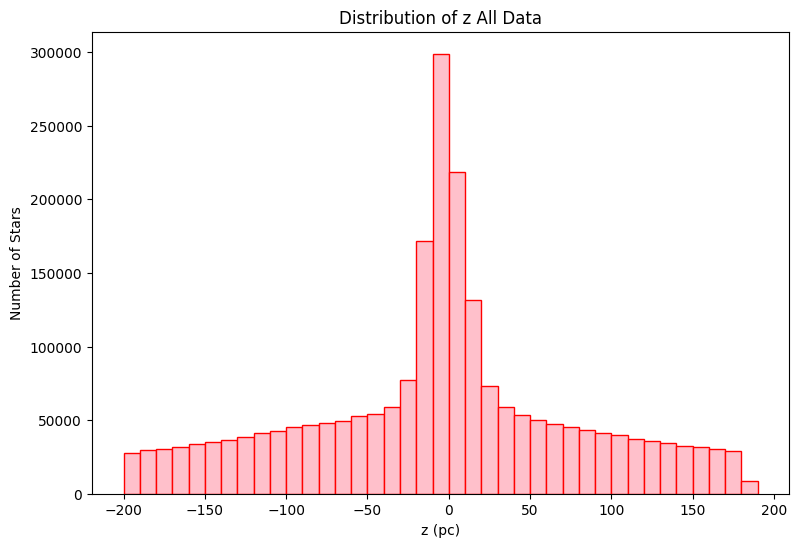

In [5]:
# z distribution histogram all data

# Hitung nilai z
distance0 = 1000/parallax0
b0_rad = np.radians(b0)
z0 = distance0 * np.sin(b0_rad)
z0_min = z0.min()
z0_max = z0.max()
z0_bins = np.arange(z0_min, z0_max + 10, 10)

# Assign nilai z0 ke DataFrame dengan cara yang benar
filtered_data['z0'] = z0

# Plot histogram
plt.figure(figsize=(9, 6))
plt.hist(z0, bins=z0_bins, color='pink', edgecolor='red')
plt.title('Distribution of z All Data')
plt.xlabel('z (pc)')
plt.ylabel('Number of Stars')
plt.show()

/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/2523515346.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set1.loc[:, 'z1'] = z1


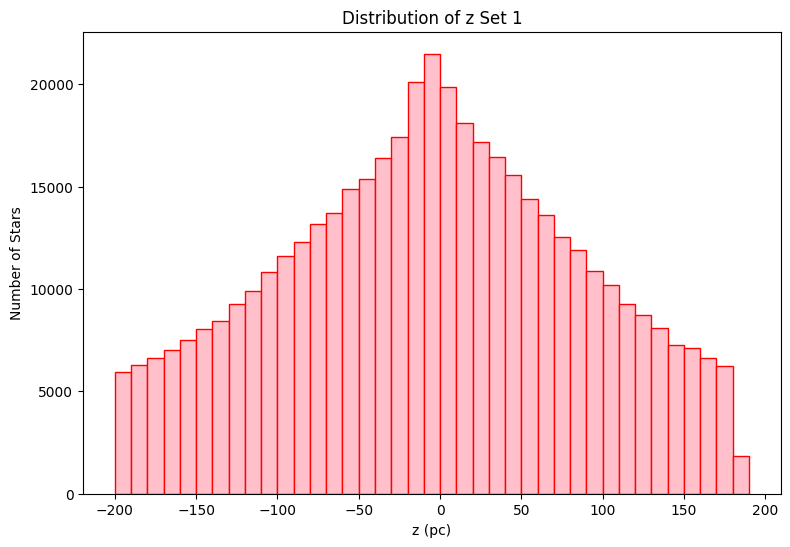

In [6]:
# z distribution histogram set 1

distance1 = 1000/parallax1
b1_rad = np.radians(b1)
z1 = distance1 * np.sin(b1_rad)
z1_min = z1.min()
z1_max = z1.max()
z1_bins = np.arange(z1_min, z1_max + 10, 10)

set1.loc[:, 'z1'] = z1
plt.figure(figsize=(9, 6))
plt.hist(z1, bins=z1_bins, color='pink', edgecolor='red')
plt.title('Distribution of z Set 1')
plt.xlabel('z (pc)')
plt.ylabel('Number of Stars')
plt.show()

/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/4228636424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2['z'] = z2


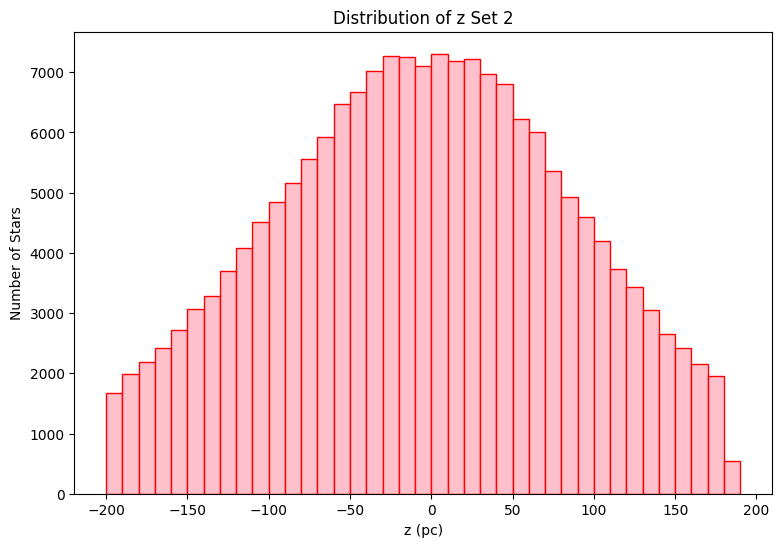

In [7]:
# z distribution histogram set 2

distance2 = 1000/parallax2
b2_rad = np.radians(b2)
z2 = distance2 * np.sin(b2_rad)
z2_min = z2.min()
z2_max = z2.max()
z2_bins = np.arange(z2_min, z2_max + 10, 10)

set2['z'] = z2
plt.figure(figsize=(9, 6))
plt.hist(z2, bins=z2_bins, color='pink', edgecolor='red')
plt.title('Distribution of z Set 2')
plt.xlabel('z (pc)')
plt.ylabel('Number of Stars')
plt.show()

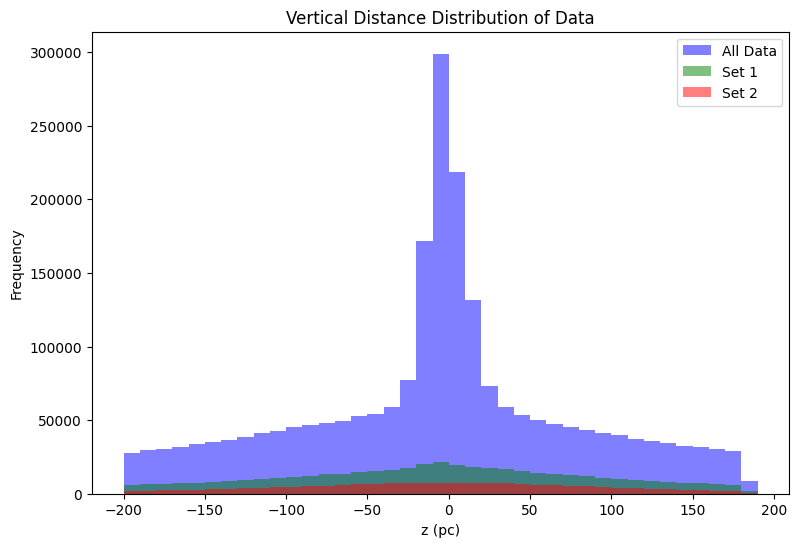

In [8]:
# mixed 3 histogram of z

plt.figure(figsize=(9, 6))
plt.hist(z0, bins=z0_bins, alpha=0.5, label='All Data', color='blue')
plt.hist(z1, bins=z1_bins, alpha=0.5, label='Set 1', color='green')
plt.hist(z2, bins=z2_bins, alpha=0.5, label='Set 2', color='red')
plt.xlabel('z (pc)')
plt.ylabel('Frequency')
plt.title('Vertical Distance Distribution of Data')
plt.legend()
plt.show()

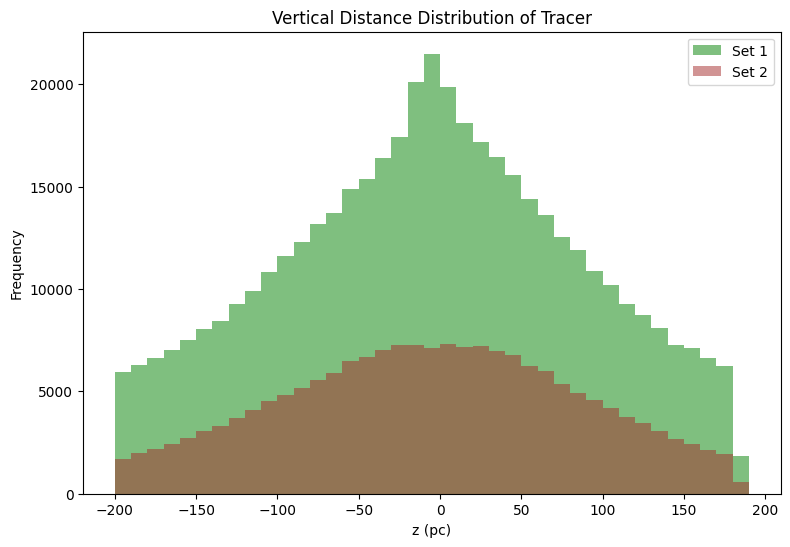

In [9]:
# mixed 2 histogram of z

plt.figure(figsize=(9, 6))
plt.hist(z1, bins=z1_bins, alpha=0.5, label='Set 1', color='green')
plt.hist(z2, bins=z2_bins, alpha=0.5, label='Set 2', color='brown')
plt.xlabel('z (pc)')
plt.ylabel('Frequency')
plt.title('Vertical Distance Distribution of Tracer')
plt.legend()
plt.show()

--- Tracers Number Density (ν(z)) ---

In [10]:
# nu(z) every bin

counts, bin_edges = np.histogram(z1, bins=z1_bins)
bin_width = np.diff(bin_edges)
radi = z1_bins[:-1] + bin_width / 2
volume_bins = np.pi * radi**2 * bin_width
nu_z1 = counts / volume_bins
for i in range(len(counts)):
    print(f"Bin {i+1}: N = {counts[i]}, l = {bin_width[i]},V = {volume_bins[i]}, nu_z = {nu_z1[i]}")

Bin 1: N = 5970, l = 10.0,V = 1194564.6833632493, nu_z = 0.0049976364471044825
Bin 2: N = 6299, l = 10.0,V = 1075185.491927089, nu_z = 0.0058585239917161675
Bin 3: N = 6624, l = 10.0,V = 962089.485798108, nu_z = 0.006885014437617531
Bin 4: N = 7030, l = 10.0,V = 855276.6649763066, nu_z = 0.008219562497001773
Bin 5: N = 7490, l = 10.0,V = 754747.029461685, nu_z = 0.00992385489127683
Bin 6: N = 8049, l = 10.0,V = 660500.5792542429, nu_z = 0.012186211871438408
Bin 7: N = 8416, l = 10.0,V = 572537.3143539802, nu_z = 0.014699478599916502
Bin 8: N = 9281, l = 10.0,V = 490857.23476089735, nu_z = 0.018907738019835627
Bin 9: N = 9906, l = 10.0,V = 415460.3404749939, nu_z = 0.023843431093024465
Bin 10: N = 10822, l = 10.0,V = 346346.6314962701, nu_z = 0.031246153465524736
Bin 11: N = 11615, l = 10.0,V = 283516.10782472586, nu_z = 0.040967689945788116
Bin 12: N = 12272, l = 10.0,V = 226968.76946036128, nu_z = 0.05406911280868195
Bin 13: N = 13187, l = 10.0,V = 176704.61640317622, nu_z = 0.0746273

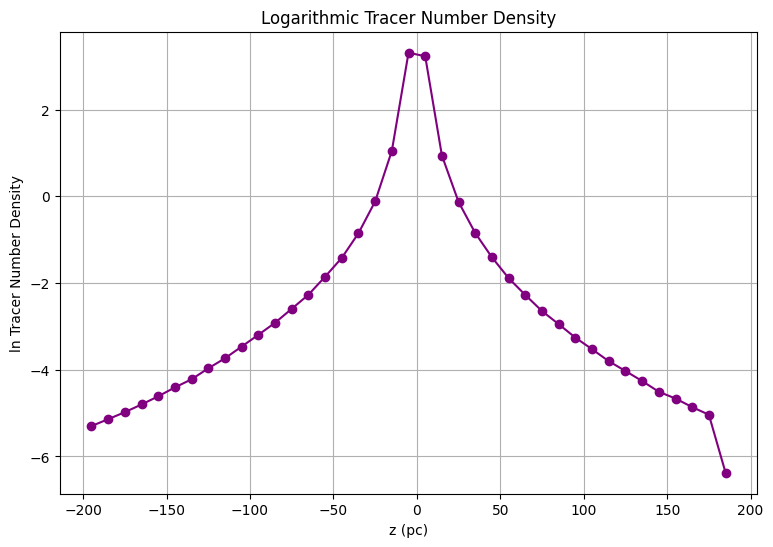

In [11]:
# ln(nu(z)) plot

log_nu_z1 = np.log(nu_z1)
z_mid = z1_bins[:-1] + bin_width / 2

plt.figure(figsize=(9, 6))
plt.plot(z_mid, log_nu_z1, color='purple', marker='o', linestyle='-', linewidth=1.5)
plt.xlabel('z (pc)')
plt.ylabel('ln Tracer Number Density')
plt.title('Logarithmic Tracer Number Density')
plt.grid(True)
plt.show()

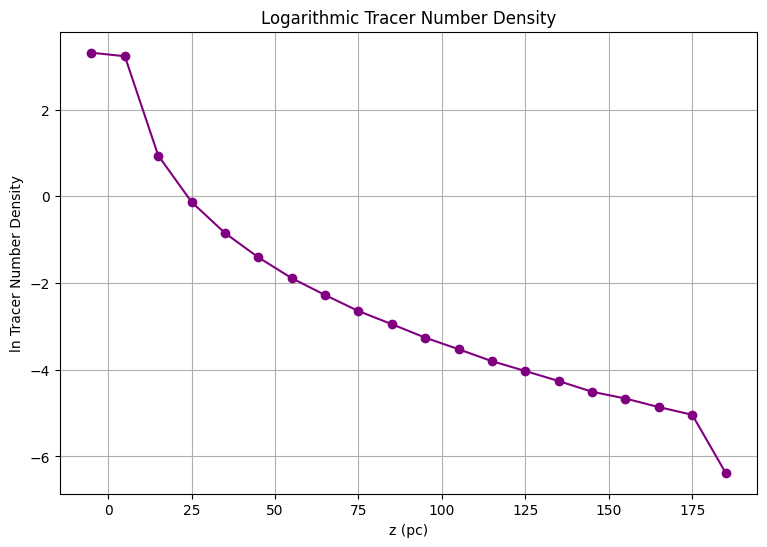

In [12]:
# average of ln(nu (z))

peak_index = np.argmax(nu_z1)
#nu_z1_avg = np.mean(nu_z1[peak_index:])
#log_nu_z1_avg = np.log(nu_z1_avg)
z_mid = z1_bins[:-1] + bin_width / 2

plt.figure(figsize=(9, 6))
plt.plot(z_mid[peak_index:], np.log(nu_z1[peak_index:]), color='purple', marker='o', linestyle='-', linewidth=1.5)
plt.xlabel('z (pc)')
plt.ylabel('ln Tracer Number Density')
plt.title('Logarithmic Tracer Number Density')
plt.grid(True)
plt.show()

--- Tracer Number Density on Galaxy Plane (ν(z0)) and Tracer Altitude Scale Height (ht) ---

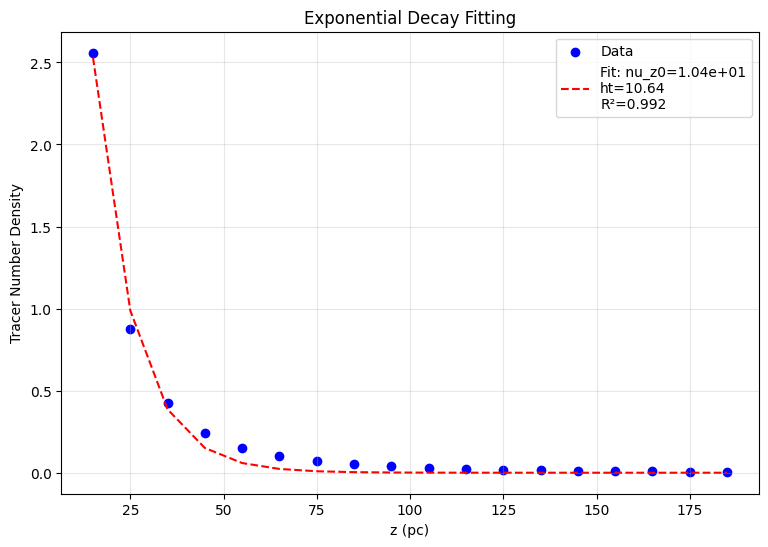

In [13]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Filter data
nu_z1_fil = nu_z1[2:]
z_mid_fil = z_mid[2:]
z_fit = z_mid_fil[peak_index:]
nu_fit = nu_z1_fil[peak_index:]

def fitting(z1, nu_z0, ht):
    return nu_z0 * np.exp(-z1 / ht)

# Tambahkan initial guess dan bounds
initial_guess = [np.max(nu_fit), np.mean(z_fit)]  # Perkiraan awal untuk nu_z0 dan ht
bounds = ([0, 0], [np.inf, np.inf])  # Parameter harus positif

try:
    params, covariance = curve_fit(
        fitting,
        z_fit,
        nu_fit,
        p0=initial_guess,
        bounds=bounds,
        maxfev=10000  # Tambah maksimum iterasi
    )
    nu_z0, ht = params

    # Hitung R-squared untuk mengevaluasi fitting
    residuals = nu_fit - fitting(z_fit, nu_z0, ht)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((nu_fit - np.mean(nu_fit))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot hasil
    plt.figure(figsize=(9, 6))
    plt.scatter(z_fit, nu_fit, color='blue', label='Data')
    plt.plot(z_fit, fitting(z_fit, nu_z0, ht),
             color='red', linestyle='--',
             label=f'Fit: nu_z0={nu_z0:.2e}\nht={ht:.2f}\nR²={r_squared:.3f}')
    plt.xlabel('z (pc)')
    plt.ylabel('Tracer Number Density')
    plt.title('Exponential Decay Fitting')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

except RuntimeError as e:
    print("Fitting error:", e)

In [14]:
# # error nu(z0) dan ht

# nu_z_data = nu_fit
# nu_z_model = linear_fit(z_fit, *params)
# z = z_fit
# z_avg = np.mean(z_fit)
# N = len (z)
# m = 2
# nu_z0 = params[0]
# ht = params[1]

# # Error calculation improvement
# epsilon = ((1 / (N - m)) * np.sum((np.log(nu_z_data) - np.log(nu_z_model))**2))
# epsilon_b0 = (np.sum(z**2) / (N * np.sum((z - z_avg)**2))) * epsilon
# epsilon_b1 = epsilon**2 / np.sum((z - z_avg) ** 2)  # Corrected from epsilon**2

# epsilon_nu_z0 = epsilon_b0 * nu_z0
# epsilon_ht = epsilon_b1 * ht

# print("Error nu_z0 : ", epsilon_nu_z0)
# print("Error ht : ", epsilon_ht)

In [15]:
# error nu(z0) dan ht

nu_z_data = nu_fit
nu_z_model = fitting(z_fit, *params)
z = z_fit
z_avg = np.mean(z_fit)
N = len (z)
m = 2
nu_z0 = params[0]
ht = params[1]

# Error calculation improvement
epsilon = ((1 / (N - m)) * np.sum((np.log(nu_z_data) - np.log(nu_z_model))**2))
epsilon_b0 = (np.sum(z**2) / (N * np.sum((z - z_avg)**2))) * epsilon
epsilon_b1 = epsilon**2 / np.sum((z - z_avg) ** 2)  # Corrected from epsilon**2

epsilon_nu_z0 = epsilon_b0 * nu_z0
epsilon_ht = epsilon_b1 * ht

print("Error nu_z0 : ", epsilon_nu_z0)
print("Error ht : ", epsilon_ht)

Error nu_z0 :  78.15988755664436
Error ht :  0.1817199184834027


# Calculate Tracers Vertical Velocity Dispersion (σ)

--- Velocity Transform ---

In [16]:
# transform velocity coordinate to find up(z)

from astropy.coordinates import SkyCoord
from astropy import units as u
import pandas as pd

stars2 = SkyCoord(ra = ra2.values * u.deg,
                  dec = dec2.values * u.deg,
                  distance = (1 / parallax2.values) * u.kpc,
                  pm_ra_cosdec = pmra2.values * u.mas/u.yr,
                  pm_dec = pmdec2.values * u.mas/u.yr,
                  radial_velocity = radial_velocity2.values * u.km/u.s)

galactic_velocities = stars2.galactic.cartesian.differentials['s']

set2.loc[:, 'up_x'] = galactic_velocities.d_x.to(u.km/u.s).value
set2.loc[:, 'up_y'] = galactic_velocities.d_y.to(u.km/u.s).value
set2.loc[:, 'up_z'] = galactic_velocities.d_z.to(u.km/u.s).value

summary_set2 = pd.DataFrame({
    'Data': set2.count(),
    'NaN': set2.isna().sum()})
summary_set2.reset_index(inplace=True)
summary_set2.columns = ['Parameter', 'Data', 'NaN']
print(summary_set2)

                Parameter    Data  NaN
0                      ra  179686    0
1                ra_error  179686    0
2                     dec  179686    0
3               dec_error  179686    0
4                parallax  179686    0
5          parallax_error  179686    0
6                    pmra  179686    0
7              pmra_error  179686    0
8                   pmdec  179686    0
9             pmdec_error  179686    0
10        phot_g_mean_mag  179686    0
11                  bp_rp  179686    0
12        radial_velocity  179686    0
13  radial_velocity_error  179686    0
14                      b  179686    0
15               teff_val  179686    0
16            distance_pc  179686    0
17                      z  179686    0
18                  r_cyl  179686    0
19        phot_v_mean_mag  179686    0
20                    M_V  179686    0
21                  class  179686    0
22                   up_x  179686    0
23                   up_y  179686    0
24                   up_z

/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1828521632.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2.loc[:, 'up_x'] = galactic_velocities.d_x.to(u.km/u.s).value
/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1828521632.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2.loc[:, 'up_y'] = galactic_velocities.d_y.to(u.km/u.s).value
/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1828521632.py:18: SettingWithCopyWarning: 
A value is tryin

In [17]:
# mu_b matrics

delta_g = np.radians(27.12825)
alpha_g = np.radians(192.85948)

def convert_mu_b(mu_alpha, mu_delta, b, delta, alpha):
    c1 = np.sin(delta_g) * np.cos(delta) - np.cos(delta_g) * np.sin(delta) * np.cos(alpha - alpha_g)
    c2 = np.cos(delta_g) * np.sin(alpha - alpha_g)
    mu_b = 1 / np.cos(b) * (-c2 * mu_alpha + c1 * mu_delta)
    return mu_b

# test sembarang nilai
#mu = np.array([1,2])
#b = np.radians(45)
#delta = np.radians(20)
#alpha = np.radians(30)
#print(transform_matriks(mu, b, delta, alpha))

In [18]:
# defined variable before the longest error equation lol
# eq. 3.16

alpha_g = np.radians(192.85948)
delta_g = np.radians(27.12825)
alpha = np.radians(ra2)
error_alpha = ra_error2/206265
delta = np.radians(dec2)
error_delta = dec_error2/206265
b = np.radians(b2)
mu_alpha = pmra2
error_mu_alpha = pmra_error2
mu_delta = pmdec2
error_mu_delta = pmdec_error2
mu_b = convert_mu_b(mu_alpha, mu_delta, b, delta, alpha)
# error_mu_b = to be find
pi = parallax2
error_pi = parallax_error2
up_r = radial_velocity2
error_up_r = radial_velocity_error2
up_tb = 4.74 * mu_b / pi # proper motion = 4.74
# error_up_tb = to be find satuannya: mu_b = boleh dalam mas/yr, pi = mas
# up_z = up_z
# error_up_z = to be find

In [19]:
print(error_alpha.iloc[0], alpha.iloc[0])
print(error_delta.iloc[0], delta.iloc[0])
print(error_mu_alpha.iloc[0], mu_alpha.iloc[0])

2.225244200705505e-07 4.283237392703851
2.2616414273243304e-07 0.2542654197293924
0.0895005525995917 -38.01777908095754


In [20]:
# calculate error with longggghhh equation

def calculate_error_mu_b(alpha, delta, b, error_mu_alpha, error_mu_delta):
    A = (np.sin(delta_g) * np.cos(delta) / np.cos(b)) - (np.cos(delta_g) * np.sin(delta) * np.cos(alpha - alpha_g) / np.cos(b))
    B = np.cos(delta_g) * np.sin(alpha - alpha_g) / np.cos(b)
    error_mu_b = np.sqrt((A**2 * error_mu_delta**2) + (B**2 * error_mu_alpha**2))
    return error_mu_b

def calculate_error_up_tb(pi, mu_b, error_pi, error_mu_b):
    error_up_tb = np.sqrt(((-4.74 * mu_b / pi**2)**2 * error_pi**2) + ((4.74 / pi)**2 * error_mu_b**2))
    return error_up_tb

def calculate_error_up_z(b, up_r, up_tb, error_up_r, error_up_tb):
    error_up_z = np.sqrt(((np.cos(b))**2 * error_up_tb**2) + ((np.sin(b))**2 * error_up_r**2))
    return error_up_z

# Apply these functions and assign results back to the dataframe
error_mu_b = calculate_error_mu_b(alpha, delta, b, error_mu_alpha, error_mu_delta)
error_up_tb = calculate_error_up_tb(pi, mu_b, error_pi, error_mu_b)
error_up_z = calculate_error_up_z(b, up_r, up_tb, error_up_r, error_up_tb)

set2.loc[:, 'error_mu_b'] = error_mu_b
set2.loc[:, 'error_up_tb'] = error_up_tb
set2.loc[:, 'error_up_z'] = error_up_z

print(set2.head())

            ra  ra_error        dec  dec_error  parallax  parallax_error  \
17  245.411425  0.045899  14.568335   0.046650  9.348655        0.075872   
20  313.090839  0.020626  40.056341   0.024389  9.995730        0.027077   
24  245.225769  0.021291  14.721420   0.017986  7.368490        0.033168   
34  307.269955  0.033776 -40.040980   0.021414  7.574789        0.045023   
50  307.184950  0.039608 -40.775006   0.022119  6.092978        0.057118   

         pmra  pmra_error       pmdec  pmdec_error  ...       r_cyl  \
17 -38.017779    0.089501 -187.794530     0.082194  ...   82.329050   
20  49.755284    0.048588   46.034629     0.042410  ...   99.919884   
24 -28.392495    0.040309   -6.300816     0.034020  ...  104.111806   
34   1.194965    0.071721  -46.740305     0.045351  ...  108.015879   
50  28.766813    0.078309  -49.497526     0.047004  ...  134.229606   

    phot_v_mean_mag       M_V    class       up_x       up_y       up_z  \
17        10.250819  5.104565  Class K  8

/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1238657655.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2.loc[:, 'error_mu_b'] = error_mu_b
/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1238657655.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2.loc[:, 'error_up_tb'] = error_up_tb
/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/1238657655.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [21]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179686 entries, 17 to 2338389
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ra                     179686 non-null  float64
 1   ra_error               179686 non-null  float64
 2   dec                    179686 non-null  float64
 3   dec_error              179686 non-null  float64
 4   parallax               179686 non-null  float64
 5   parallax_error         179686 non-null  float64
 6   pmra                   179686 non-null  float64
 7   pmra_error             179686 non-null  float64
 8   pmdec                  179686 non-null  float64
 9   pmdec_error            179686 non-null  float64
 10  phot_g_mean_mag        179686 non-null  float64
 11  bp_rp                  179686 non-null  float64
 12  radial_velocity        179686 non-null  float64
 13  radial_velocity_error  179686 non-null  float64
 14  b                      179686 non-null 

--- Tracer Vertical Velocity Dispersion (σ(z)) ---

In [22]:
z2_min = z2.min()
z2_max = z2.max()
z2_bins = np.arange(z2_min, z2_max + 10, 10)
print("Setelah didefinisikan ulang:", z2_bins)

Setelah didefinisikan ulang: [-1.99981023e+02 -1.89981023e+02 -1.79981023e+02 -1.69981023e+02
 -1.59981023e+02 -1.49981023e+02 -1.39981023e+02 -1.29981023e+02
 -1.19981023e+02 -1.09981023e+02 -9.99810232e+01 -8.99810232e+01
 -7.99810232e+01 -6.99810232e+01 -5.99810232e+01 -4.99810232e+01
 -3.99810232e+01 -2.99810232e+01 -1.99810232e+01 -9.98102325e+00
  1.89767515e-02  1.00189768e+01  2.00189768e+01  3.00189768e+01
  4.00189768e+01  5.00189768e+01  6.00189768e+01  7.00189768e+01
  8.00189768e+01  9.00189768e+01  1.00018977e+02  1.10018977e+02
  1.20018977e+02  1.30018977e+02  1.40018977e+02  1.50018977e+02
  1.60018977e+02  1.70018977e+02  1.80018977e+02  1.90018977e+02]


In [23]:
# calculate sigma_z_data

set2.loc[:, 'z2_bins'] = pd.cut(z2, bins=z2_bins)
up_z_avg_bin = []
error_up_z_avg_bin = []
sigma_z_data = []
n_bin = []

for _, group in set2.groupby('z2_bins', observed=True):
    N = len(group)
    n_bin.append(N)
    if N > 1:
        up_z_avg = group['up_z'].mean()
        error_up_z_avg = group['error_up_z'].mean()
        sigma_z_bin = np.sqrt(np.sum((group['up_z'] - up_z_avg) ** 2) / (N - 1))

        up_z_avg_bin.append(up_z_avg)
        error_up_z_avg_bin.append(error_up_z_avg)
        sigma_z_data.append(sigma_z_bin)
    else:
        up_z_avg_bin.append(np.nan)
        error_up_z_avg_bin.append(np.nan)
        sigma_z_data.append(np.nan)

sigma_z_df = pd.DataFrame({
    'Bin': z2_bins[:-1],
    'N': n_bin,
    'Up_z': up_z_avg_bin,
    'Error_up_z': error_up_z_avg_bin,
    'Sigma_z_data': sigma_z_data})
print(sigma_z_df)

           Bin     N      Up_z  Error_up_z  Sigma_z_data
0  -199.981023  1676 -7.938646    1.726366     21.679538
1  -189.981023  1989 -8.328870    1.638305     21.222537
2  -179.981023  2191 -8.686349    1.678195     21.272407
3  -169.981023  2415 -8.169675    1.578908     21.060398
4  -159.981023  2720 -7.775402    1.544191     21.683986
5  -149.981023  3073 -8.293688    1.478688     21.301086
6  -139.981023  3287 -7.972667    1.387123     20.847733
7  -129.981023  3697 -8.426475    1.355626     20.751489
8  -119.981023  4078 -8.008500    1.228887     19.762335
9  -109.981023  4509 -8.121125    1.179249     20.526318
10  -99.981023  4837 -7.484474    1.088890     20.086943
11  -89.981023  5157 -8.125244    1.040605     20.163162
12  -79.981023  5563 -7.926077    0.956991     20.039075
13  -69.981023  5921 -8.296358    0.825216     19.789372
14  -59.981023  6469 -8.152024    0.766980     19.317444
15  -49.981023  6668 -8.104596    0.640070     19.812081
16  -39.981023  7028 -7.637587 

/var/folders/f8/sfvcnkwx62g3v6xnb7x8g7580000gn/T/ipykernel_79188/287888672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set2.loc[:, 'z2_bins'] = pd.cut(z2, bins=z2_bins)


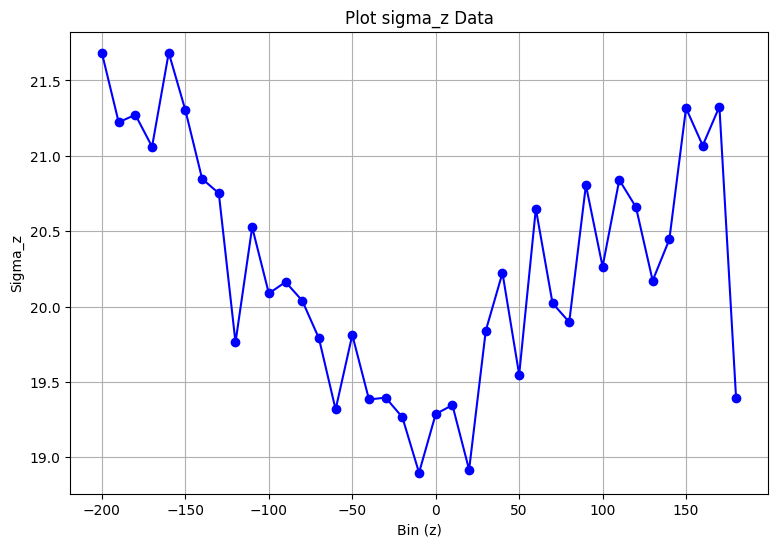

In [24]:
# plot of sigma_data

plt.figure(figsize=(9, 6))
plt.plot(sigma_z_df['Bin'], sigma_z_df['Sigma_z_data'], marker='o', linestyle='-', color='b')
plt.title('Plot sigma_z Data')
plt.xlabel('Bin (z)')
plt.ylabel('Sigma_z')
plt.grid()
plt.show()

In [25]:
# calculate error_sigma_data

error_sigma_z = []

up_z_total_avg = set2['up_z'].mean()

for i, (bin_label, group) in enumerate(set2.groupby('z2_bins', observed=True)):
    sigma_data = sigma_z_df.loc[i, 'Sigma_z_data']

    if N > 0:
        I11, I22, I12 = 0, 0, 0

        for _, star in group.iterrows():
            up_z_i = star['up_z']
            error_up_z_i = star['error_up_z']
            suku1 = sigma_data**2 + error_up_z_i**2
            suku2 = (up_z_i - up_z_total_avg)**2
            I11 += (1 / suku1)
            I22 += ((1 / suku1) - ((suku2 + 2 * sigma_data**2) / suku1**2) + (4 * sigma_data**2 * suku2 / suku1**3))
            I12 += ((2 * sigma_data * suku2) / suku1**2)


        #print(f"Bin={i}, N={N}")
        #print(f"  Sigma_z_data = {sigma_data}")
        #print(f"  I11 = {I11}")
        #print(f"  I22 = {I22}")
        #print(f"  I12 = {I12}")

        denominator = np.abs(I11 * I22 - I12**2)
        #print(f"  Demoninator = {denominator}")
        if denominator != 0:
            error_sigma_z_bin = np.sqrt(I11 /(denominator))
        else:
            error_sigma_z_bin = np.nan
    else:
        error_sigma_z_bin = "N not found"

    error_sigma_z.append(error_sigma_z_bin)

sigma_z_df['Error_sigma_z'] = error_sigma_z
print(sigma_z_df)

           Bin     N      Up_z  Error_up_z  Sigma_z_data  Error_sigma_z
0  -199.981023  1676 -7.938646    1.726366     21.679538       0.012470
1  -189.981023  1989 -8.328870    1.638305     21.222537       0.011482
2  -179.981023  2191 -8.686349    1.678195     21.272407       0.010913
3  -169.981023  2415 -8.169675    1.578908     21.060398       0.010426
4  -159.981023  2720 -7.775402    1.544191     21.683986       0.009768
5  -149.981023  3073 -8.293688    1.478688     21.301086       0.009240
6  -139.981023  3287 -7.972667    1.387123     20.847733       0.008846
7  -129.981023  3697 -8.426475    1.355626     20.751489       0.008369
8  -119.981023  4078 -8.008500    1.228887     19.762335       0.007972
9  -109.981023  4509 -8.121125    1.179249     20.526318       0.007551
10  -99.981023  4837 -7.484474    1.088890     20.086943       0.007276
11  -89.981023  5157 -8.125244    1.040605     20.163162       0.007040
12  -79.981023  5563 -7.926077    0.956991     20.039075       0

# Test Likehood, MCM and result with burn in data

In [26]:
import numpy as np
from astropy.constants import G
import astropy.units as u
from scipy import stats

# Constants
G_CONVERTED = G.value
SIGMA_GAS = 13.2
SIGMA_Z0 = 18.895060

# Prior ranges
PRIOR_RANGES = {
    'rho_dm': (0, 0.1),        # Dark matter density
    'sigma_stars': (20, 50),    # Stellar surface density
    'h_stars': (200, 400),      # Stellar scale height
    'ht': (420, 430),          # Total scale height
    'nu_z0': (0.0020, 0.0030)  # Initial number density
}

def calculate_mass_contribution(z, ht, h_stars, sigma_stars, sigma_gas, rho_dm):
    """
    Calculate the mass contribution term in the Jeans equation.

    Parameters:
        z (float): Height above galactic plane
        ht (float): Scale height
        h_stars (float): Stellar scale height
        sigma_stars (float): Stellar surface density
        sigma_gas (float): Gas surface density
        rho_dm (float): Dark matter density

    Returns:
        float: Mass contribution term
    """
    stellar_term = sigma_stars * (1 - (h_stars / (ht + h_stars)) * np.exp(-z / h_stars))
    gas_term = sigma_gas
    dm_term = 2 * rho_dm * (z + ht)

    return 2 * np.pi * G_CONVERTED * ht * (stellar_term + gas_term + dm_term)

def calculate_jeans_solution(z, ht, nu_z0, sigma_z0, fz, fz0):
    """
    Calculate the solution to the Jeans equation with improved numerical stability.

    Parameters:
        z (float): Height above galactic plane
        ht (float): Scale height
        nu_z0 (float): Initial number density
        sigma_z0 (float): Initial velocity dispersion
        fz (float): Mass contribution at height z
        fz0 (float): Mass contribution at z=0

    Returns:
        float: Velocity dispersion at height z
    """
    # Avoid underflow in exp
    if z/ht > 100:
        return np.nan

    denominator = nu_z0 * np.exp(-z / ht)
    if denominator < 1e-15:  # Numerical threshold
        return np.nan

    term = (nu_z0 * sigma_z0**2 - nu_z0 * fz0) / denominator

    # Check if result would be negative
    if fz + term < 0:
        return np.nan

    return np.sqrt(fz + term)

def calculate_model_dispersions(z_bins, z_data, params):
    """
    Calculate model velocity dispersions for each height bin.

    Parameters:
        z_bins (array): Bin edges for height
        z_data (array): Height data
        params (tuple): Model parameters (rho_dm, sigma_stars, h_stars, ht, nu_z0)

    Returns:
        array: Model velocity dispersions for each bin
    """
    rho_dm, sigma_stars, h_stars, ht, nu_z0 = params

    # Calculate fz0 once at z=0
    fz0 = calculate_mass_contribution(0, ht, h_stars, sigma_stars, SIGMA_GAS, rho_dm)
    sigma_z_model = []

    for i in range(len(z_bins) - 1):
        z_bin_data = z_data[(z_data >= z_bins[i]) & (z_data < z_bins[i + 1])]

        if len(z_bin_data) > 0:
            z_bin_center = np.mean(z_bin_data)

            # Calculate mass contribution at current height
            fz = calculate_mass_contribution(z_bin_center, ht, h_stars, sigma_stars,
                                          SIGMA_GAS, rho_dm)

            # Calculate model dispersion
            sigma_z_m = calculate_jeans_solution(z_bin_center, ht, nu_z0, SIGMA_Z0,
                                               fz, fz0)
            sigma_z_model.append(sigma_z_m)
        else:
            sigma_z_model.append(np.nan)

    return np.array(sigma_z_model)

def log_likelihood(params, sigma_z_df, z2, z2_bins):
    """
    Calculate log-likelihood with improved handling of ht parameter.
    """
    rho_dm, sigma_stars, h_stars, ht, nu_z0 = params

    # Additional physical constraints
    if h_stars >= ht:  # Stellar scale height cannot be larger than total scale height
        return -np.inf

    # Minimum separation between h_stars and ht
    if (ht - h_stars) < 10:  # Minimal separation in parsecs
        return -np.inf

    # Calculate model dispersions
    sigma_z_model = calculate_model_dispersions(z2_bins, z2, params)

    # Get observed dispersions and errors
    sigma_z_data = sigma_z_df['Sigma_z_data'].values
    error_sigma_z = sigma_z_df['Error_sigma_z'].values

    # Additional checks for model validity
    if np.any(sigma_z_model <= 0) or np.any(np.isinf(sigma_z_model)):
        return -np.inf

    # Remove NaN values
    mask = ~np.isnan(sigma_z_model) & ~np.isnan(sigma_z_data) & ~np.isnan(error_sigma_z)
    if not np.any(mask):
        return -np.inf

    # Calculate chi-square with additional regularization term for ht
    chi2 = np.sum(((sigma_z_data[mask] - sigma_z_model[mask]) / error_sigma_z[mask])**2)

    # Add weak regularization term to prevent ht from becoming too large
    # but still allow more flexibility than before
    ht_reg = 0.01 * ((ht - 430.0) / 10.0)**2

    return -0.5 * chi2 - ht_reg

def log_prior(params):
    """
    Calculate log-prior probability of parameters.

    Parameters:
        params (tuple): Model parameters (rho_dm, sigma_stars, h_stars, ht, nu_z0)

    Returns:
        float: Log-prior value (0.0 if within bounds, -inf if outside)
    """
    rho_dm, sigma_stars, h_stars, ht, nu_z0 = params
    param_names = ['rho_dm', 'sigma_stars', 'h_stars', 'ht', 'nu_z0']

    for param, name in zip(params, param_names):
        low, high = PRIOR_RANGES[name]
        if not low < param < high:
            return -np.inf

    return 0.0

def log_posterior(params, sigma_z_df, z2, z2_bins):
    """
    Calculate log-posterior probability.

    Parameters:
        params (tuple): Model parameters (rho_dm, sigma_stars, h_stars, ht, nu_z0)
        sigma_z_df (DataFrame): DataFrame containing observed dispersions and errors
        z2 (array): Height data
        z2_bins (array): Height bin edges

    Returns:
        float: Log-posterior value
    """
    prior = log_prior(params)
    if not np.isfinite(prior):
        return -np.inf

    likelihood = log_likelihood(params, sigma_z_df, z2, z2_bins)
    return prior + likelihood

def generate_initial_params():
    """
    Generate random initial parameters within prior ranges.

    Returns:
        array: Random initial parameters
    """
    params = []
    for param_name in ['rho_dm', 'sigma_stars', 'h_stars', 'ht', 'nu_z0']:
        low, high = PRIOR_RANGES[param_name]
        params.append(np.random.uniform(low, high))
    return np.array(params)

In [27]:
# Generate initial parameters
initial_params = generate_initial_params()

# Calculate posterior probability
posterior = log_posterior(initial_params, sigma_z_df, z2, z2_bins)

# Calculate model dispersions
model_dispersions = calculate_model_dispersions(z2_bins, z2, initial_params)

# Add model dispersions to dataframe
sigma_z_df['Sigma_z_model'] = model_dispersions

In [28]:
import numpy as np
import emcee
import corner
from datetime import datetime
from scipy import stats
import tqdm

def run_mcmc_analysis(log_posterior, initial_params, nwalkers=32, nsteps=5000, nburn=1000,
                     sigma_z_df=None, z2=None, z2_bins=None):
    """
    Run MCMC analysis using emcee with improved convergence checking and diagnostics.

    Parameters:
        log_posterior: Posterior probability function
        initial_params: Initial parameter values
        nwalkers: Number of walkers
        nsteps: Number of steps per walker
        nburn: Number of burn-in steps to discard
        sigma_z_df: DataFrame with observational data
        z2: Height data
        z2_bins: Height bin edges

    Returns:
        dict: Results including samples, best parameters, and convergence metrics
    """
    ndim = len(initial_params)

    # Initialize walkers with a tighter ball
    pos = initial_params + 1e-3 * np.random.randn(nwalkers, ndim)

    # Ensure initial positions are within prior ranges
    param_names = ['rho_dm', 'sigma_stars', 'h_stars', 'ht', 'nu_z0']
    for i, param_name in enumerate(param_names):
        low, high = PRIOR_RANGES[param_name]
        pos[:, i] = np.clip(pos[:, i], low, high)

    # Create sampler with progress tracking
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_posterior,
        args=(sigma_z_df, z2, z2_bins)
    )

    # Run MCMC
    print(f"Starting MCMC sampling at {datetime.now()}")
    try:
        # Run burn-in
        print("Running burn-in...")
        state = sampler.run_mcmc(pos, nburn, progress=True)
        sampler.reset()

        # Run production
        print("Running production...")
        sampler.run_mcmc(state, nsteps, progress=True)
        print(f"MCMC sampling completed at {datetime.now()}")
    except Exception as e:
        print(f"Error during MCMC sampling: {str(e)}")
        return None

    # Get chain and remove burn-in
    samples = sampler.get_chain(flat=True)
    log_prob_samples = sampler.get_log_prob(flat=True)

    # Calculate convergence diagnostics
    acceptance_fraction = np.mean(sampler.acceptance_fraction)
    try:
        autocorr_time = sampler.get_autocorr_time(quiet=True)
        converged = np.all(autocorr_time * 50 < nsteps)
        mixed = np.all(autocorr_time * 100 < nsteps * nwalkers)
    except emcee.autocorr.AutocorrError:
        print("Warning: Chain too short to compute autocorrelation time")
        autocorr_time = None
        converged = False
        mixed = False

    # Calculate best parameters using HDI
    param_names = ['rho_dm', 'sigma_stars', 'h_stars', 'ht', 'nu_z0']
    best_params = {}

    def highest_density_interval(data, alpha=0.32):
        sorted_data = np.sort(data)
        n = len(data)
        interval_size = int(n * (1 - alpha))

        if interval_size == 0:
            return data.min(), data.max()

        intervals = [(sorted_data[i], sorted_data[i + interval_size - 1])
                    for i in range(n - interval_size + 1)]
        interval_widths = [high - low for low, high in intervals]
        best_idx = np.argmin(interval_widths)
        return intervals[best_idx]

    for i, name in enumerate(param_names):
        # Calculate mode using KDE
        kernel = stats.gaussian_kde(samples[:, i])
        x_grid = np.linspace(min(samples[:, i]), max(samples[:, i]), 1000)
        mode = x_grid[np.argmax(kernel(x_grid))]

        # Calculate HDI
        hdi_low, hdi_high = highest_density_interval(samples[:, i])

        best_params[name] = {
            'mode': mode,
            'hdi_low': hdi_low,
            'hdi_high': hdi_high,
            'median': np.median(samples[:, i])
        }

    return {
        'samples': samples,
        'log_prob_samples': log_prob_samples,
        'best_params': best_params,
        'acceptance_fraction': acceptance_fraction,
        'autocorr_time': autocorr_time,
        'converged': converged,
        'mixed': mixed,
        'chain': sampler.get_chain()
    }

def plot_mcmc_results(results, save_plots=False):
    """
    Create visualization plots for MCMC results with improved aesthetics.

    Parameters:
        results: Dictionary containing MCMC results
        save_plots: Whether to save plots to files
    """
    if results is None:
        print("No results to plot")
        return

    samples = results['samples']
    param_names = [r'$\rho_{dm}$', r'$\Sigma_*$', r'$h_*$', r'ht', r'nu_z0']
    units = [r'$M_\odot\,pc^{-3}$', r'$M_\odot\,pc^{-2}$', 'pc', 'pc', r'stars$\,pc^{-3}$']

    # Create corner plot
    fig = corner.corner(
        samples,
        labels=[f"{name}\n[{unit}]" for name, unit in zip(param_names, units)],
        quantiles=[0.16, 0.5, 0.84],
        show_titles=True,
        title_kwargs={"fontsize": 12},
        title_fmt='.3f'
    )

    if save_plots:
        plt.savefig('mcmc_corner.png', dpi=300, bbox_inches='tight')

    # Plot chains for convergence check
    chain = results['chain']
    fig, axes = plt.subplots(len(param_names), 1, figsize=(10, 2*len(param_names)))
    for i, (ax, name) in enumerate(zip(axes, param_names)):
        ax.plot(chain[:, :, i], alpha=0.3)
        ax.set_ylabel(name)
    axes[-1].set_xlabel('Step')

    if save_plots:
        plt.savefig('mcmc_chains.png', dpi=300, bbox_inches='tight')

    plt.show()

def print_mcmc_results(results):
    """
    Print MCMC results with improved formatting and additional diagnostics.

    Parameters:
        results: Dictionary containing MCMC results
    """
    if results is None:
        print("No results to display")
        return

    print("\nMCMC Results:")
    print("=" * 50)

    param_labels = ['ρ_dm', 'Σ_*', 'h_*', 'h_t', 'ν_0']
    units = ['M⊙ pc⁻³', 'M⊙ pc⁻²', 'pc', 'pc', 'stars pc⁻³']

    for param, label, unit in zip(
        ['rho_dm', 'sigma_stars', 'h_stars', 'ht', 'nu_z0'],
        param_labels, units
    ):
        values = results['best_params'][param]
        print(f"\n{label} ({unit}):")
        print(f"  Mode:   {values['mode']:.6f}")
        print(f"  Median: {values['median']:.6f}")
        print(f"  68% HDI: [{values['hdi_low']:.6f}, {values['hdi_high']:.6f}]")

    print("\nConvergence Diagnostics:")
    print("-" * 50)
    print(f"Mean acceptance fraction: {results['acceptance_fraction']:.3f}")

    if results['autocorr_time'] is not None:
        print("Autocorrelation times:")
        for param, tau in zip(param_labels, results['autocorr_time']):
            print(f"  {param}: {tau:.1f} steps")
        print(f"Chain converged: {results['converged']}")
        print(f"Chain well-mixed: {results['mixed']}")
    else:
        print("Warning: Chain too short to compute autocorrelation time")

def run_full_analysis(log_posterior, initial_params, sigma_z_df, z2, z2_bins,
                     nwalkers=32, nsteps=5000, nburn=1000):
    """
    Run complete MCMC analysis pipeline with improved diagnostics.

    Parameters:
        log_posterior: Posterior probability function
        initial_params: Initial parameter values
        sigma_z_df: DataFrame with observational data
        z2: Height data
        z2_bins: Height bin edges
        nwalkers: Number of walkers
        nsteps: Number of steps
        nburn: Number of burn-in steps to discard

    Returns:
        dict: Complete MCMC results
    """
    # Run MCMC
    results = run_mcmc_analysis(
        log_posterior=log_posterior,
        initial_params=initial_params,
        nwalkers=nwalkers,
        nsteps=nsteps,
        nburn=nburn,
        sigma_z_df=sigma_z_df,
        z2=z2,
        z2_bins=z2_bins
    )

    if results is not None:
        # Print results
        print_mcmc_results(results)

        # Create plots
        plot_mcmc_results(results, save_plots=True)

    return results

Starting MCMC sampling at 2025-01-22 14:23:00.633306
Running burn-in...


  0%|          | 0/200 [00:00<?, ?it/s]/Users/izza/Documents/joki/tugas astronomi/.venv/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 200/200 [07:49<00:00,  2.35s/it]


Running production...


100%|██████████| 500/500 [17:22<00:00,  2.08s/it]
N/50 = 10;
tau: [37.34588389 48.18901717 44.49795379 40.36129275 43.58157277]


MCMC sampling completed at 2025-01-22 14:48:13.678707

MCMC Results:

ρ_dm (M⊙ pc⁻³):
  Mode:   0.016329
  Median: 0.047368
  68% HDI: [0.000423, 0.067740]

Σ_* (M⊙ pc⁻²):
  Mode:   47.506273
  Median: 37.683590
  68% HDI: [31.678566, 49.998118]

h_* (pc):
  Mode:   353.296657
  Median: 336.296775
  68% HDI: [304.227970, 399.907556]

h_t (pc):
  Mode:   429.999956
  Median: 429.999866
  68% HDI: [429.999774, 430.000000]

ν_0 (stars pc⁻³):
  Mode:   0.002234
  Median: 0.002444
  68% HDI: [0.002000, 0.002628]

Convergence Diagnostics:
--------------------------------------------------
Mean acceptance fraction: 0.312
Autocorrelation times:
  ρ_dm: 37.3 steps
  Σ_*: 48.2 steps
  h_*: 44.5 steps
  h_t: 40.4 steps
  ν_0: 43.6 steps
Chain converged: False
Chain well-mixed: True


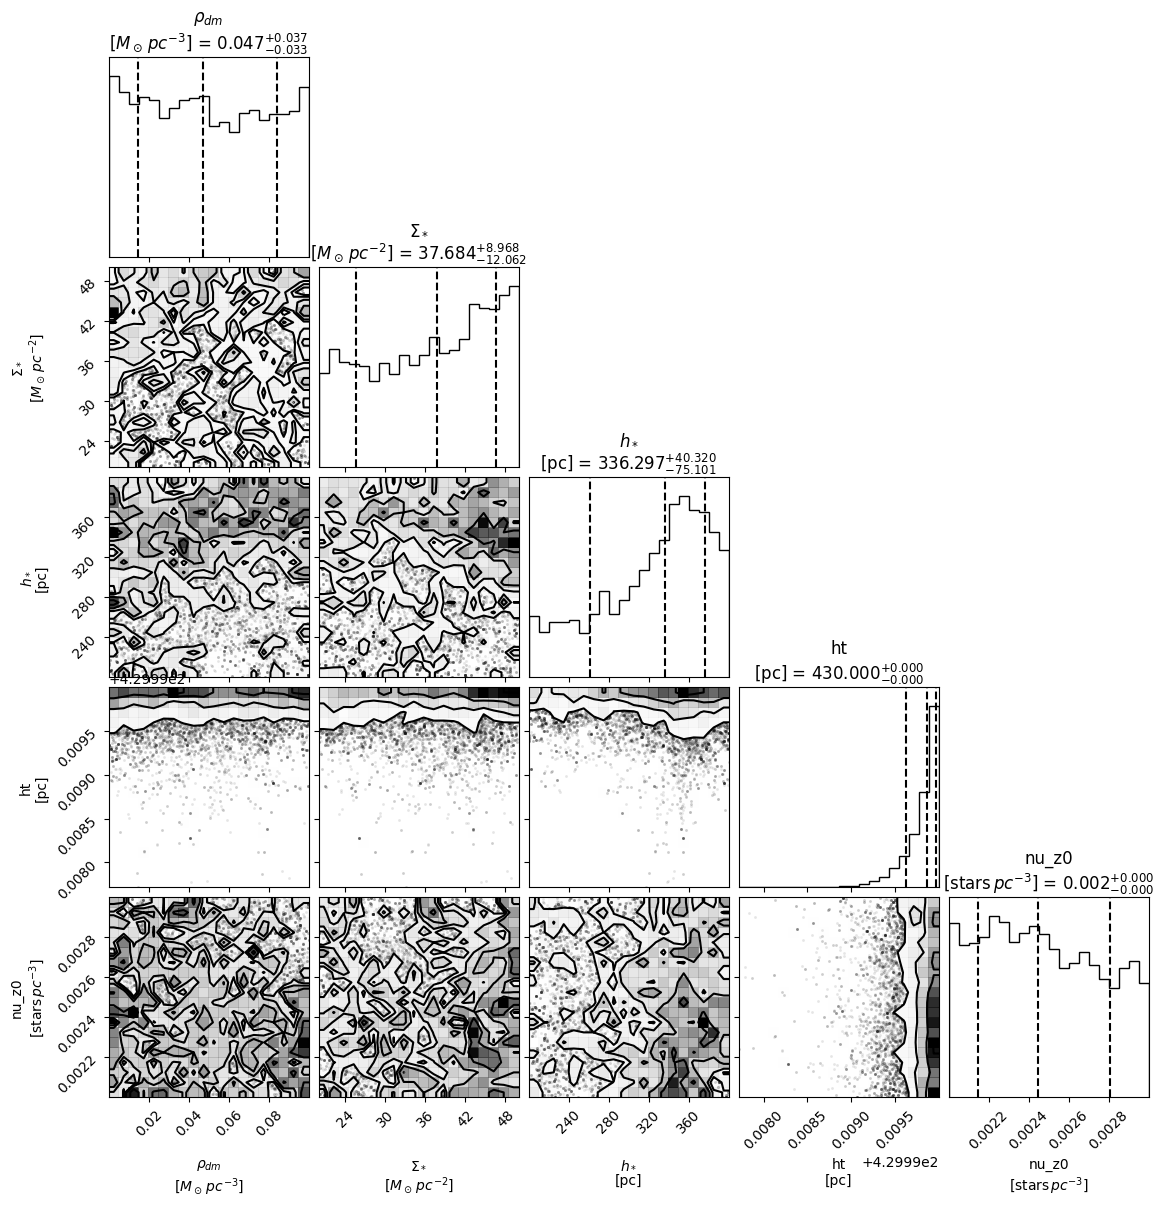

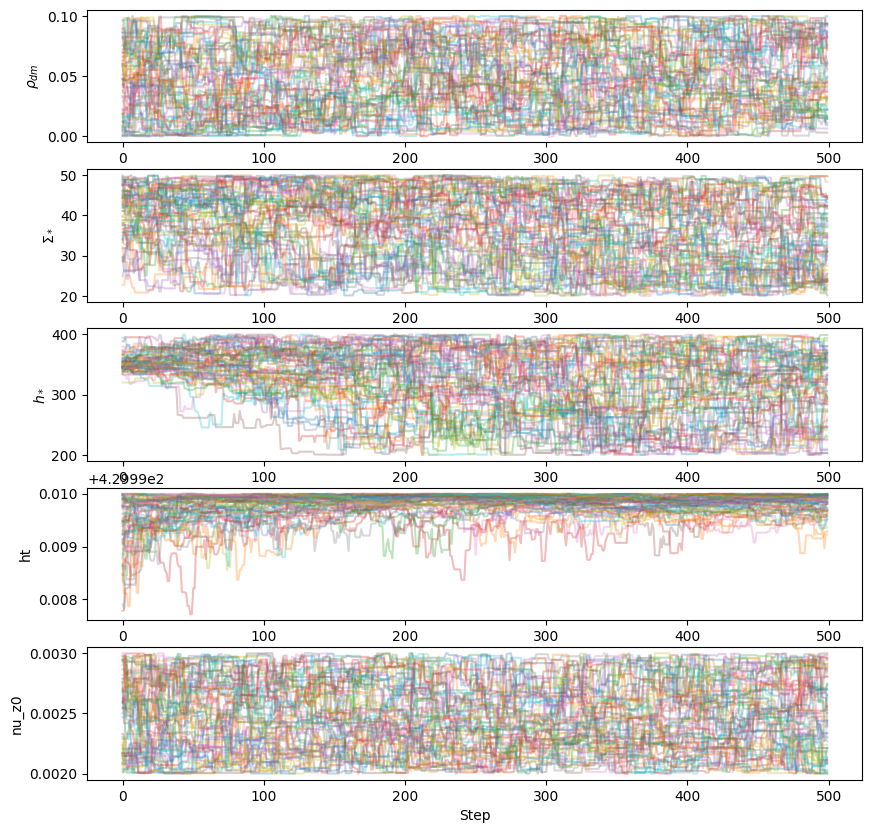

In [30]:
# Set up initial parameters and number of walkers
# initial_params = np.array([0, 36, 350, 425, 0.0025])
nwalkers = 60

# Run the full analysis
results = run_full_analysis(
    log_posterior=log_posterior,
    initial_params=initial_params,
    sigma_z_df=sigma_z_df,
    z2=z2,
    z2_bins=z2_bins,
    nwalkers=nwalkers,
    nsteps=500,
    nburn=200
)

# --
---



# Likelihood

--- Jeans Equation ---

In [ ]:
# jeans equation full

import numpy as np
import astropy.units as u
from astropy.constants import G

sigma_gas = 13.2
sigma_z0 = 18.895060
G_converted = G.to(u.pc**3 / u.Msun / u.year**2).value

nu_z0 = 0.0020 # prior
ht = 420 # prior
h_stars = 200 # prior
sigma_stars = 20 # prior
rho_dm = 0.0001 # prior

def f_z(z, ht, h_stars, sigma_stars, sigma_gas, rho_dm):
    term1 = sigma_stars * (1 - (h_stars / (ht + h_stars)) * np.exp(-z / h_stars))
    term2 = sigma_gas
    term3 = 2 * rho_dm * (z + ht)
    return 2 * np.pi * G_converted * ht * (term1 + term2 + term3)

z2 = z2
z2_0 = z2.iloc[0]
def f_z0(z2_0, ht, h_stars, sigma_stars, sigma_gas, rho_dm):
    return f_z(z2_0, ht, h_stars, sigma_stars, sigma_gas, rho_dm)

def jeans_equation(z, ht, nu_z0, sigma_z0, fz, fz0):
    return np.sqrt(fz + (nu_z0 * sigma_z0**2 - nu_z0 * fz0) / (nu_z0 * np.exp(-z / ht)))

z2_bins = z2_bins
sigma_z_model = []

for i in range(len(z2_bins) - 1):
    z_bin_data = z2[(z2 >= z2_bins[i]) & (z2 < z2_bins[i + 1])]
    if len(z_bin_data) > 0:
        z_bin_center = np.mean(z_bin_data)
        fz0 = f_z0(z_bin_center, ht, h_stars, sigma_stars, sigma_gas, rho_dm)
        fz = f_z(z_bin_center, ht, h_stars, sigma_stars, sigma_gas, rho_dm)
        sigma_z_m = jeans_equation(z_bin_center, ht, nu_z0, sigma_z0, fz, fz0)
        sigma_z_model.append(sigma_z_m)
    else:
        sigma_z_model.append(np.nan)
        print(f"Bin {i}: Tidak ada data, menambahkan NaN")

if len(sigma_z_model) == len(z2_bins) - 1:
    sigma_z_df['Sigma_z_model'] = sigma_z_model
    print(sigma_z_df)
else:
    print("Panjang sigma_z_model tidak sesuai dengan jumlah bin.")

           Bin     N      Up_z  Error_up_z  Sigma_z_data  Error_sigma_z  \
0  -182.981023  1676 -7.938646    1.726366     21.679538       0.012470   
1  -172.981023  1989 -8.328870    1.638305     21.222537       0.011482   
2  -162.981023  2191 -8.686349    1.678195     21.272407       0.010913   
3  -152.981023  2415 -8.169675    1.578908     21.060398       0.010426   
4  -142.981023  2720 -7.775402    1.544191     21.683986       0.009768   
5  -132.981023  3073 -8.293688    1.478688     21.301086       0.009240   
6  -122.981023  3287 -7.972667    1.387123     20.847733       0.008846   
7  -112.981023  3697 -8.426475    1.355626     20.751489       0.008369   
8  -102.981023  4078 -8.008500    1.228887     19.762335       0.007972   
9   -92.981023  4509 -8.121125    1.179249     20.526318       0.007551   
10  -82.981023  4837 -7.484474    1.088890     20.086943       0.007276   
11  -72.981023  5157 -8.125244    1.040605     20.163162       0.007040   
12  -62.981023  5563 -7.9

In [ ]:
print(np.mean(sigma_z_df['Sigma_z_data']))
print(np.mean(sigma_z_df['Sigma_z_model']))

20.263583153204802
19.337297269909577


In [ ]:
print(np.mean(sigma_z_data))
print(np.mean(sigma_z_model))

20.263583153204802
19.337297269909577


--- Likelihood Function ---

In [ ]:
# # log-likelihood function

# def log_likelihood(theta):
#     rho_dm, sigma_stars, h_stars, ht, nu_z0 = theta
#     sigma_z_data = sigma_z_df['Sigma_z_data'].values
#     sigma_z_model = sigma_z_df['Sigma_z_model'].values
#     error_sigma_z = sigma_z_df['Error_sigma_z'].values

#     chi_bin = ((sigma_z_data - sigma_z_model) / error_sigma_z)**2
#     chi2 = np.sum(chi_bin)
#     log_likelihood = (-0.5 * chi2)

#     #for i, chi in enumerate(chi_bin):
#         #print(f"Bin {i}: chi2 = {chi:.4f}")

#     #print("chi2 total:", chi2.4f)
#     #print("log likelihood value:", log_likelihood)

#     return log_likelihood

# # prior function

# def log_prior(theta):
#     rho_dm, sigma_stars, h_stars, ht, nu_z0 = theta

#     if (0.0001 < rho_dm < 0.1 and
#         20 < sigma_stars < 50 and
#         200 < h_stars < 400 and
#         420 < ht < 430 and
#         0.0020 < nu_z0 < 0.0030):
#         return 0.0
#     else:
#         return -np.inf

# def log_posterior(theta):
#     if not np.isfinite(log_prior(theta)):
#         return -np.inf
#     return log_prior(theta) + log_likelihood(theta)

# theta_example = np.random.uniform([0.0001, 20, 200, 420, 0.0020], [0.1, 50, 400, 430, 0.0030])
# likelihood_value = log_likelihood(theta_example)
# print(likelihood_value)

-1855336.9969881403


# MCMC

In [ ]:
pip install emcee

In [ ]:
# setting MCMC

nwalkers = 50
ndim = 5
# nburn = 1000
p0 = np.random.uniform(
    [0.0001, 20, 200, 420, 0.0020],
    [0.1, 50, 400, 430, 0.0030],
    size=(nwalkers, ndim))

# run MCMC sampling

import emcee
try:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)
    sampler.run_mcmc(p0, 10000, progress=True)

    samples = sampler.get_chain(flat=True)

    mean_params = np.mean(samples, axis=0)
    rho_dm_best, sigma_stars_best, h_stars_best, ht_best, nu_z0_best = mean_params

    print(f"Best estimate of dark matter density: {rho_dm_best}")
    print(f"Best estimate of sigma_stars: {sigma_stars_best}")
    print(f"Best estimate of h_stars: {h_stars_best}")
    print(f"Best estimate of ht: {ht_best}")
    print(f"Best estimate of nu_z0: {nu_z0_best}")
except Exception as e:
    print(f"Error during MCMC sampling: {e}")

emcee: Exception while calling your likelihood function:
  params: [5.11721141e-02 2.81698756e+01 3.46493053e+02 4.25805260e+02
 2.45837984e-03]
  args: []
  kwargs: {}
  exception:
Error during MCMC sampling: log_posterior() missing 3 required positional arguments: 'sigma_z_df', 'z2', and 'z2_bins'


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: log_posterior() missing 3 required positional arguments: 'sigma_z_df', 'z2', and 'z2_bins'


In [ ]:
# Get the chain from the sampler
chain = sampler.get_chain()

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot parameters over iterations
# Plot 1: rho_dm (dark matter density)
axes[0].plot(chain[:, :, 0].mean(axis=1), color='orange')
axes[0].set_xlabel('Iterasi')
axes[0].set_ylabel(r'$\rho_{dm}$ (M$_\odot$ pc$^{-3}$)')
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Plot 2: sigma_stars (stellar velocity dispersion)
axes[1].plot(chain[:, :, 1].mean(axis=1), color='lime')
axes[1].set_xlabel('Iterasi')
axes[1].set_ylabel(r'$\Sigma_*$ (M$_\odot$ pc$^{-2}$)')

# Plot 3: ht (tracer scale height)
axes[2].plot(chain[:, :, 3].mean(axis=1), color='gold')
axes[2].set_xlabel('Iterasi')
axes[2].set_ylabel('ht (pc)')

# Plot 4: h_stars (stellar scale height)
axes[3].plot(chain[:, :, 2].mean(axis=1), color='purple')
axes[3].set_xlabel('Iterasi')
axes[3].set_ylabel('h* (pc)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

AttributeError: you must run the sampler with 'store == True' before accessing the results

# Result (Posterior Distribution for FP)

In [ ]:
pip install corner

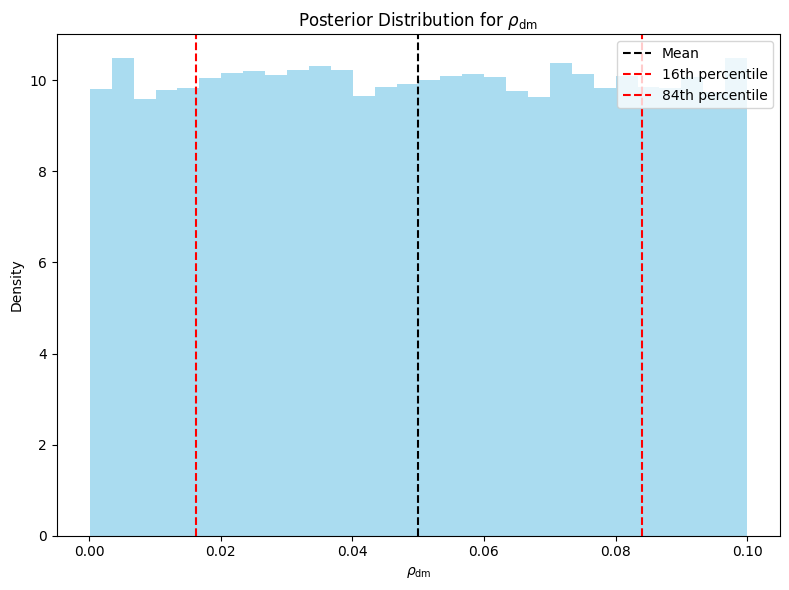

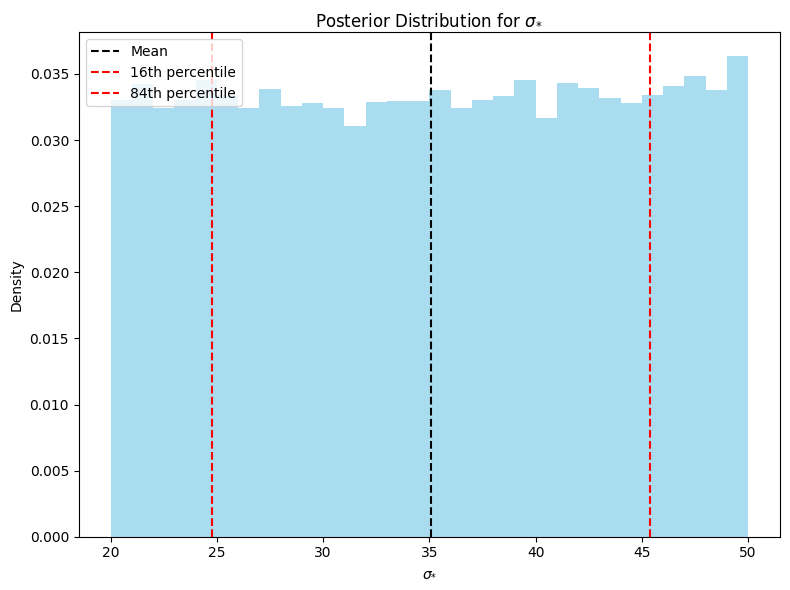

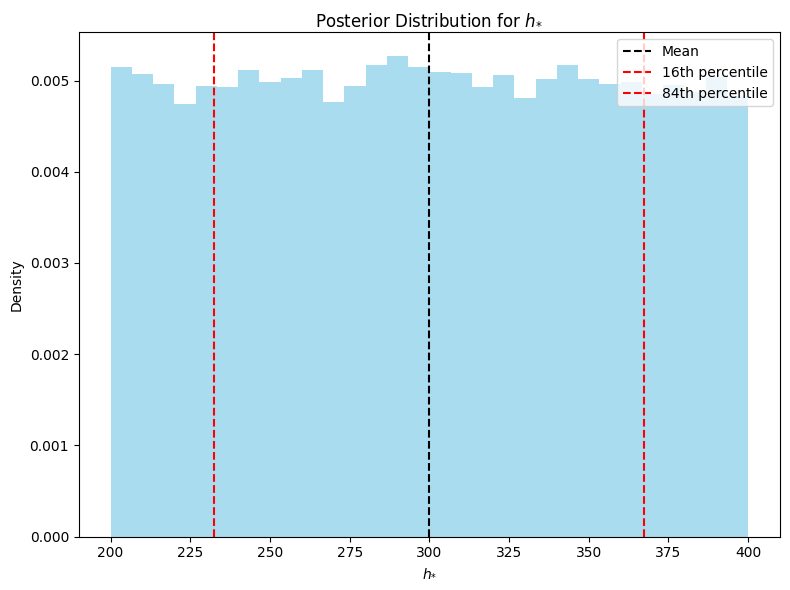

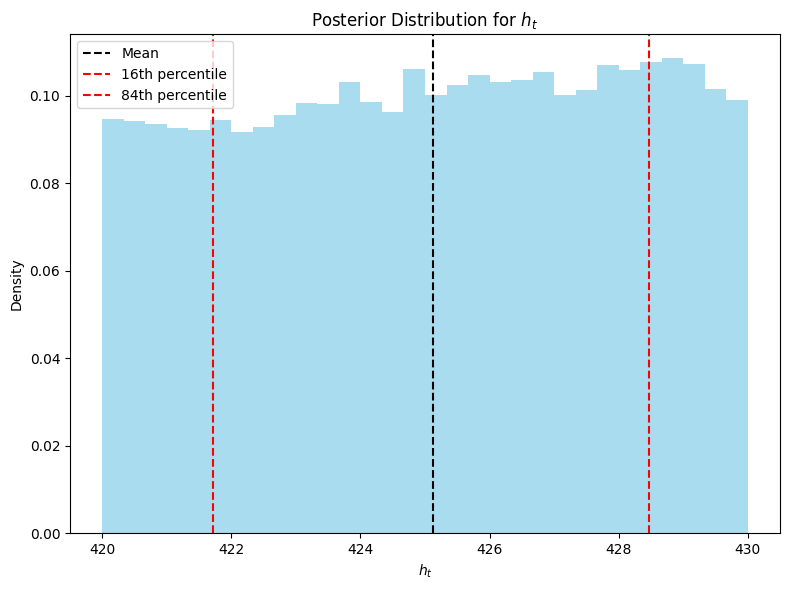

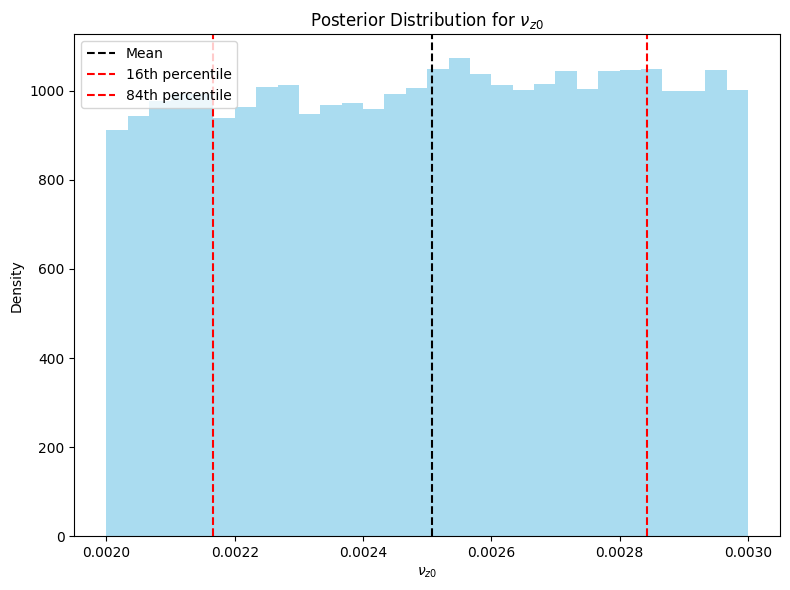

In [ ]:
# Convert samples to a 2D shape (nsteps*nwalkers, ndim) if not already
if samples.ndim == 3:
    samples = samples.reshape(-1, samples.shape[-1])

# Define labels for plotting
labels = [r"$\rho_{\rm dm}$", r"$\sigma_{*}$", r"$h_{*}$", r"$h_{t}$", r"$\nu_{z0}$"]
truths = [0.04975, 35.18272, 298.91711, 425.05640, 0.002515]  # Update these values based on known truths if available

# Create individual histograms
for i, label in enumerate(labels):
    plt.figure(figsize=(8, 6))
    plt.hist(samples[:, i], bins=30, density=True, alpha=0.7, color='skyblue')
    plt.title(f'Posterior Distribution for {label}')
    plt.axvline(np.mean(samples[:, i]), color='k', linestyle='--', label='Mean')
    plt.axvline(np.percentile(samples[:, i], 16), color='r', linestyle='--', label='16th percentile')
    plt.axvline(np.percentile(samples[:, i], 84), color='r', linestyle='--', label='84th percentile')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

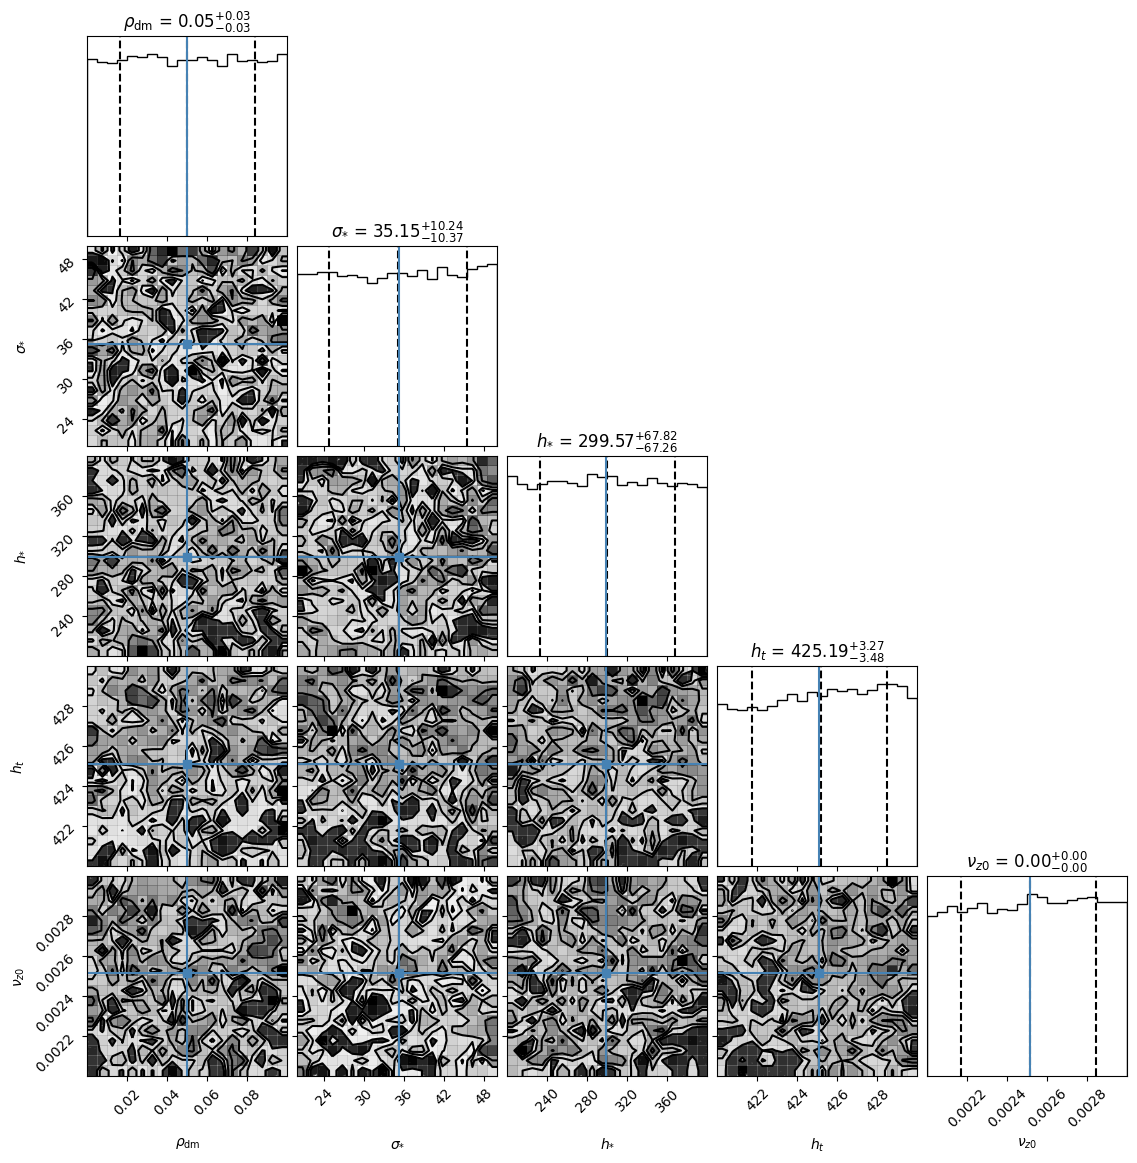

In [ ]:
import corner
# Generate the corner plot
fig = corner.corner(samples, labels=labels, truths=truths,
                    quantiles=[0.16, 0.5, 0.84], show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()

1. ;Poleski, Rados law (2013). “Transformation of the equatorial proper motion to the
galactic system”. arXiv preprint arXiv:1306.2945. find mu_b